Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [135]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [137]:
df.shape

(8425, 23)

The dataset Contains 8425 rows and 23 columns where 21 are independent variables and 2 is target variable

In [138]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

This dataset contains two types of data:object and float64

In [139]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here we can see we have lot of null values present in our columns so filling them

In [140]:
df.duplicated().sum()

1663

In [141]:
df=df.drop_duplicates()
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[6762 rows x 23 columns]

Here we can see we have lot of null values present in our columns so filling them

In [142]:
features= df.select_dtypes(include=['object']).columns
print(features)
for i in features:
    df[i] = df[i].fillna(df[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [143]:
features_1 = df.select_dtypes(include=['float']).columns
print(features_1)
for i in features_1:
    df[i] = df[i].fillna(df[i].mean())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [144]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We have successfully filled all null values now lets check with heatmap as well

<Axes: >

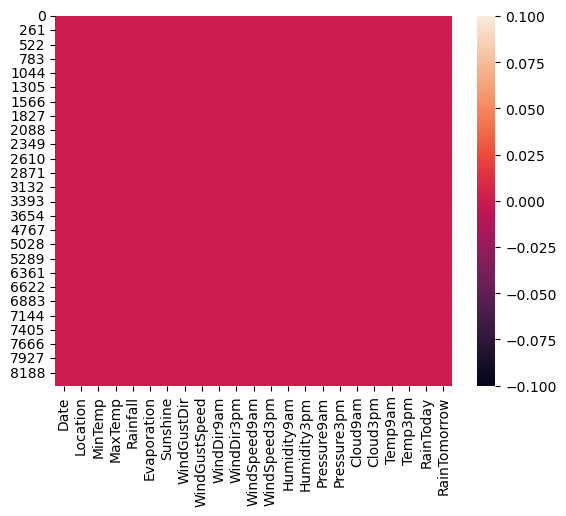

In [145]:
sns.heatmap(df.isnull())

From the heatmap it is clear that there is no missing data present in our dataset

In [146]:
df['Day']= df['Date'].str.split('-').str[2]
df['Month']= df['Date'].str.split('-').str[1]
df['Year'] = df['Date'].str.split('-').str[0]

In [147]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6762 non-null   float64
 3   MaxTemp        6762 non-null   float64
 4   Rainfall       6762 non-null   float64
 5   Evaporation    6762 non-null   float64
 6   Sunshine       6762 non-null   float64
 7   WindGustDir    6762 non-null   object 
 8   WindGustSpeed  6762 non-null   float64
 9   WindDir9am     6762 non-null   object 
 10  WindDir3pm     6762 non-null   object 
 11  WindSpeed9am   6762 non-null   float64
 12  WindSpeed3pm   6762 non-null   float64
 13  Humidity9am    6762 non-null   float64
 14  Humidity3pm    6762 non-null   float64
 15  Pressure9am    6762 non-null   float64
 16  Pressure3pm    6762 non-null   float64
 17  Cloud9am       6762 non-null   float64
 18  Cloud3pm

In [149]:
df.nunique().to_frame("No. of unique values")

No. of unique values
Date                           3004
Location                         12
MinTemp                         286
MaxTemp                         332
Rainfall                        251
Evaporation                     117
Sunshine                        141
WindGustDir                      16
WindGustSpeed                    53
WindDir9am                       16
WindDir3pm                       16
WindSpeed9am                     35
WindSpeed3pm                     36
Humidity9am                      91
Humidity3pm                      95
Pressure9am                     385
Pressure3pm                     375
Cloud9am                         10
Cloud3pm                         10
Temp9am                         305
Temp3pm                         329
RainToday                         2
RainTomorrow                      2
Day                              31
Month                            12
Year                             10

In [150]:
df.shape

(6762, 26)

In [151]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.540667     6.130123    10.482769     3.343713     2.733639   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.600000     0.000000     4.000000     7.890896   
50%      13.109145    23.500000     0.000000     5.302395     7.890896   
75%      17.400000    28.400000     1.200000     5.302395     9.200000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        13.376457      9.787577      9.548634    17.182700    18.498341   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        38.977663     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.027914     5.967638     2.474649     2.323276     5.722411   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.626311  1015.119923     4.336806     4.320988    17.900000   
75%    1020.900000  1018.400000     7.000000     6.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm          Day        Month         Year  
count  6762.000000  6762.000000  6762.000000  6762.000000  
mean     22.708561    15.737208     6.462141  2012.052203  
std       5.971845     8.793898     3.377471     2.301057  
min       7.300000     1.000000     1.000000  2008.000000  
25%      18.400000     8.000000     4.000000  2010.000000  
50%      22.300000    16.000000     6.000000  2012.000000  
75%      26.800000    23.000000     9.000000  2014.000000  
max      44.100000    31.000000    12.000000  2017.000000

From the above we observe that:
1.The count is same for all the columns which means there is no missing values present in our dataset
2.The mean is greater than the meadian(50%) in some columns which means data is skewed to right for these columns
3.The mean is less than median(50%) in some so the data is skewed to left for these columns
4.There is a huge difference in 75% and max for some columns which shows huge outliers present in those columns

Univariate Analysis

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


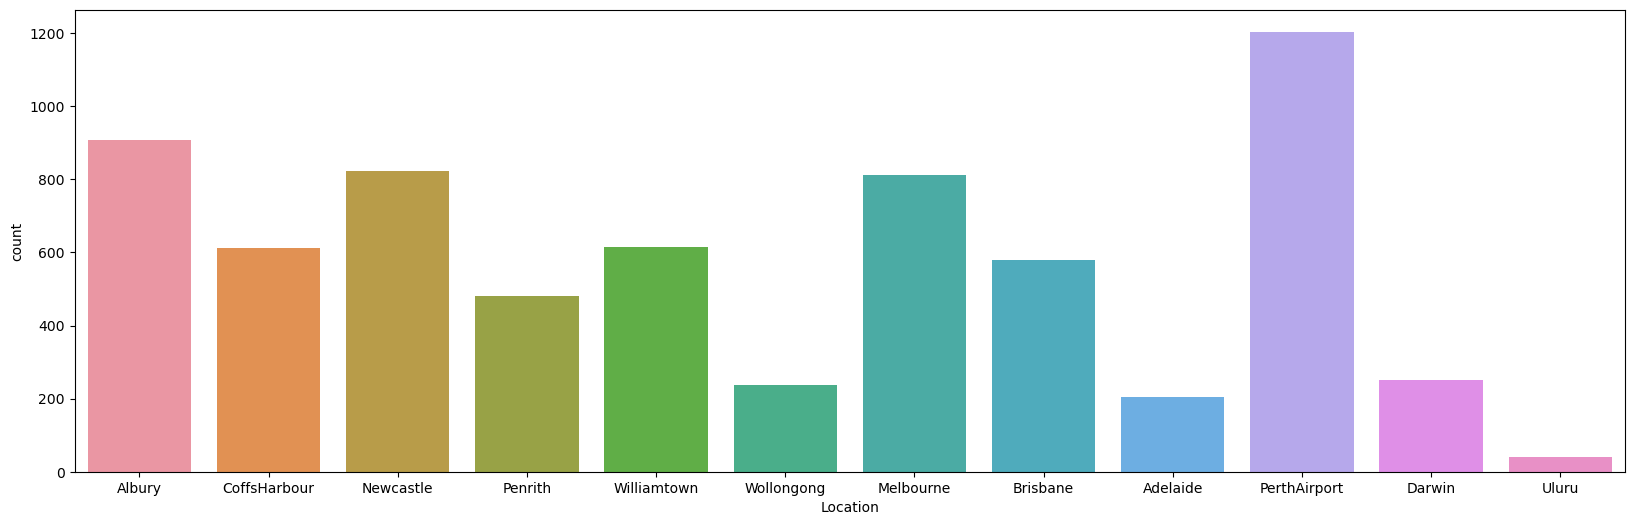

In [152]:
plt.figure(figsize=(20,6))
sns.countplot(x=df['Location'])
print(df['Location'].value_counts())

Here we can see that prefered location is PerthAirport

E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


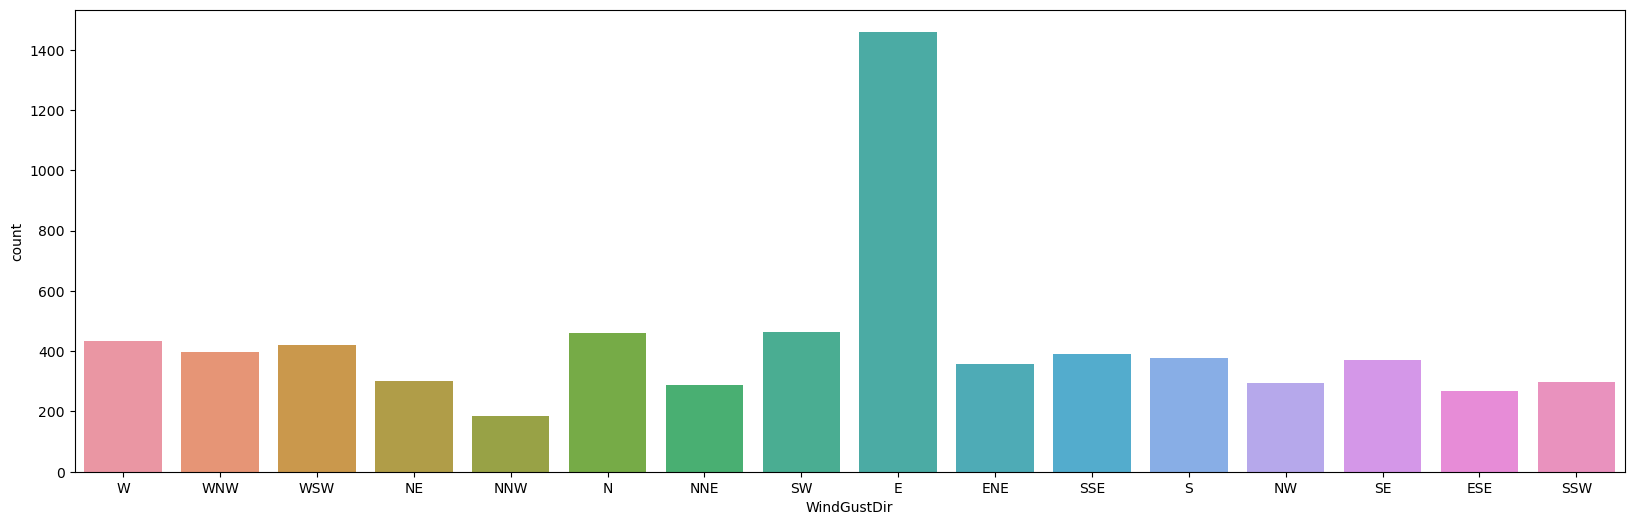

In [153]:
plt.figure(figsize=(20,6))
sns.countplot(x=df['WindGustDir'])
print(df['WindGustDir'].value_counts())

Here we see WindGustDirection is Maximum at N

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64


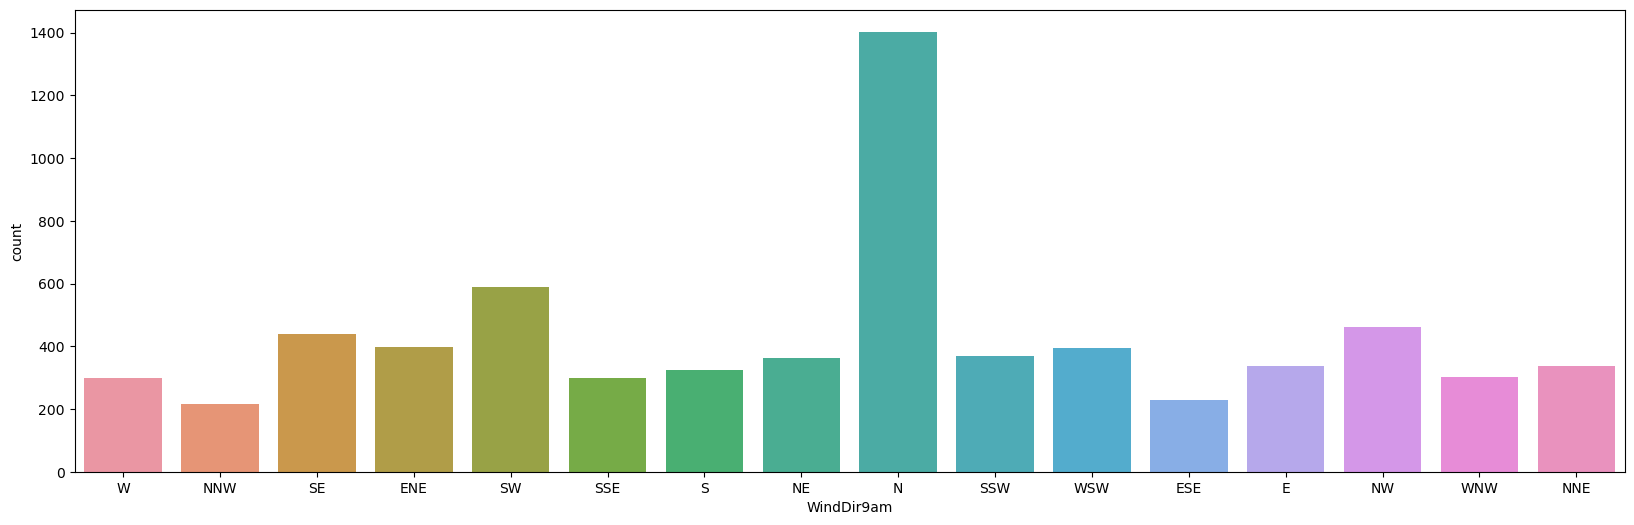

In [154]:
plt.figure(figsize=(20,6))
sns.countplot(x=df['WindDir9am'])
print(df['WindDir9am'].value_counts())

From the above we see that WindDir9am is maximum at N

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64


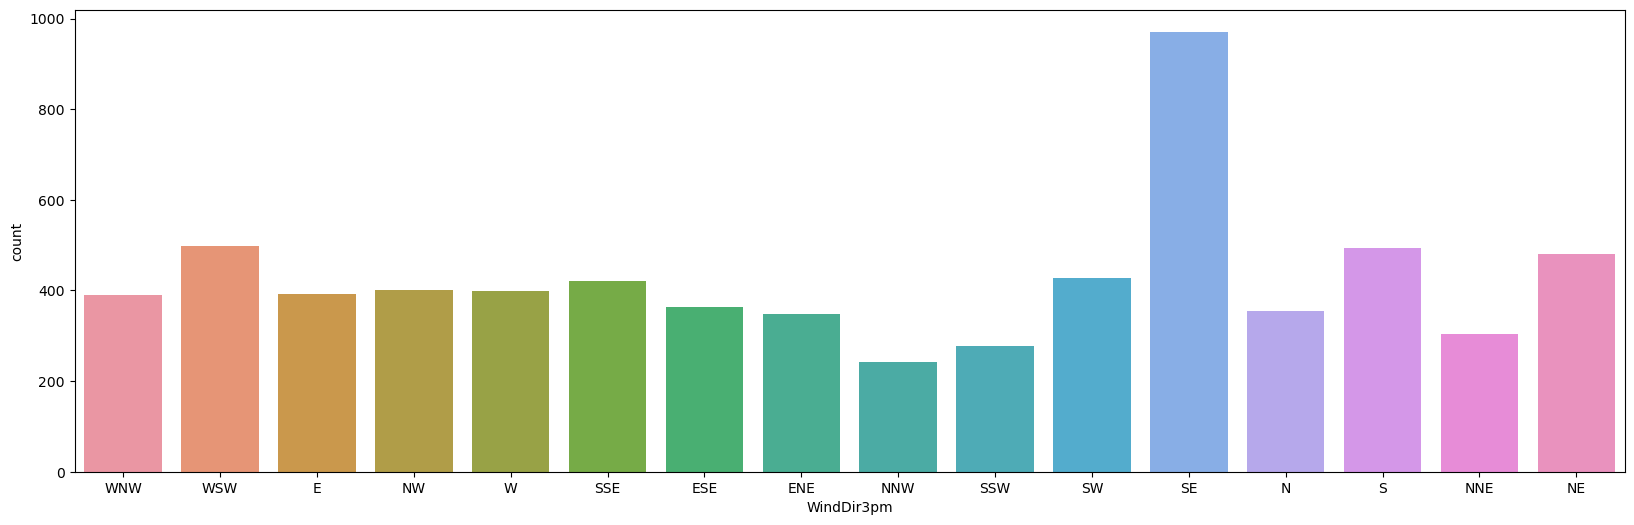

In [155]:
plt.figure(figsize=(20,6))
sns.countplot(x=df['WindDir3pm'])
print(df['WindDir3pm'].value_counts())

Here we can see that WindDir3pm is maximum at SE

<Axes: xlabel='MinTemp', ylabel='Count'>

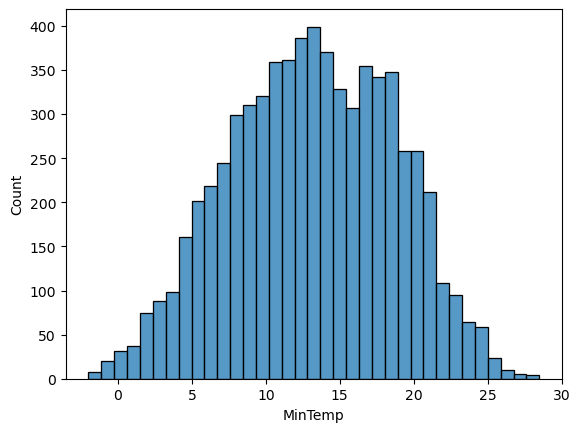

In [156]:
sns.histplot(x=df['MinTemp'])

Here we can see that MinTemp is goes to 13-14

<Axes: xlabel='MaxTemp', ylabel='Count'>

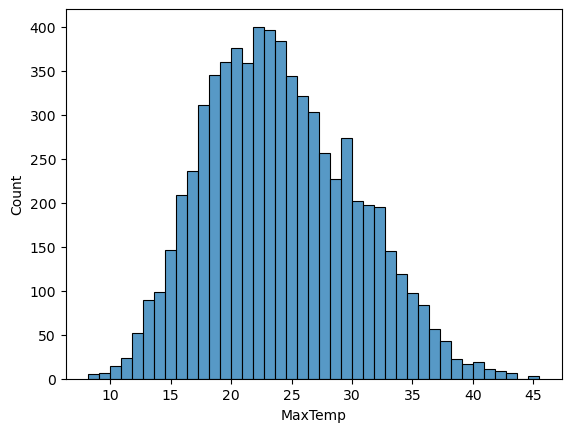

In [157]:
sns.histplot(df['MaxTemp'])

From the above we see that maximum temp goes to around 22-23

In [158]:
sns.distplot(df['Rainfall'])

<Axes: xlabel='Rainfall', ylabel='Density'>

Here we can see Rainfall is maximum around 0.175

<Axes: xlabel='Evaporation', ylabel='Density'>

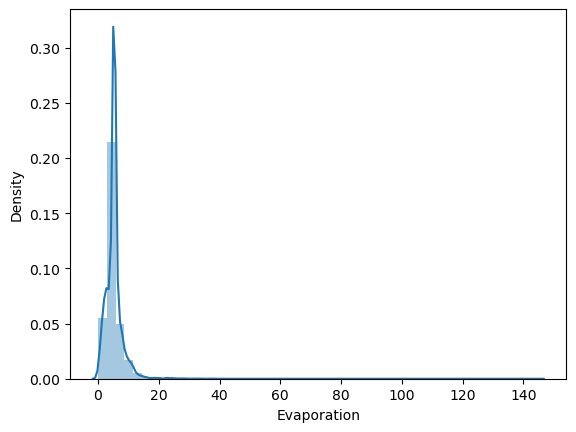

In [159]:
sns.distplot(df['Evaporation'])

Here we see Evaporation is maximum around 0.30

<Axes: xlabel='Sunshine', ylabel='Count'>

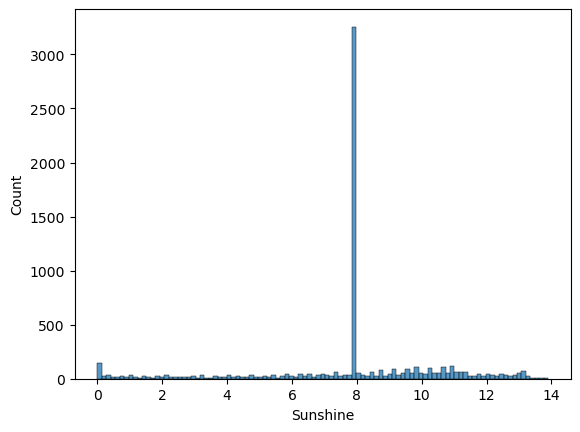

In [160]:
sns.histplot(df['Sunshine'])

Here we see that Sunshine is maximum around 7 in points close to 8

<Axes: xlabel='WindGustSpeed', ylabel='Count'>

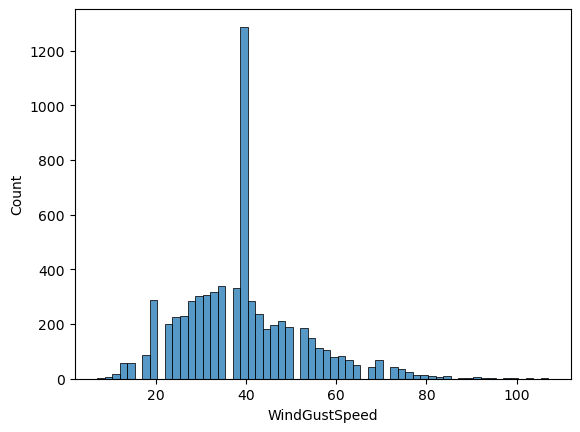

In [161]:
sns.histplot(df['WindGustSpeed'])

Here we see that WindGustSpeed is maximum around 40 

<Axes: xlabel='WindSpeed9am', ylabel='Count'>

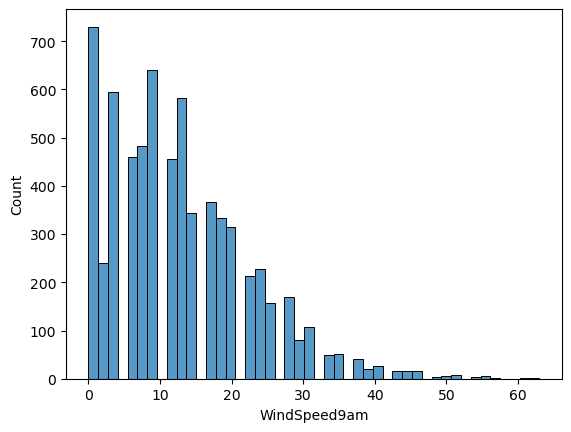

In [162]:
sns.histplot(df['WindSpeed9am'])

Here we see that WindSpeed9am is maximum around 9-9.5

In [163]:
sns.histplot(df['WindSpeed3pm'])

<Axes: xlabel='WindSpeed3pm', ylabel='Count'>

Here we see that WindSpeed3pm ia maximum around 20

In [164]:
sns.histplot(df['Humidity9am'])

<Axes: xlabel='Humidity9am', ylabel='Count'>

Here we see Humididty9am is maximum around 62

In [165]:
sns.histplot(df['Humidity3pm'])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

Here we see Humidity3pm is maximum around 50

In [166]:
sns.histplot(df['Pressure9am'])

<Axes: xlabel='Pressure9am', ylabel='Count'>

From the above we conclude that Pressure9am is maximum around 1018

<Axes: xlabel='Pressure3pm', ylabel='Count'>

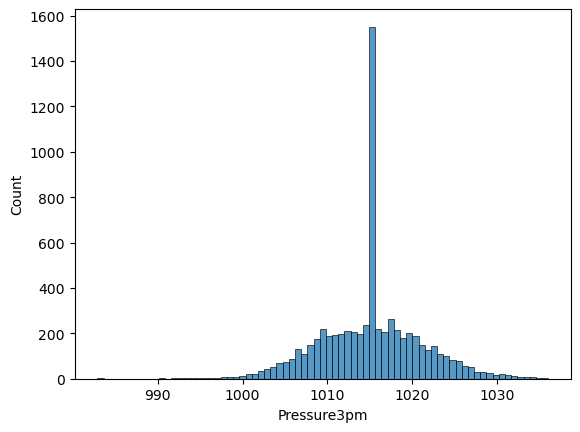

In [167]:
sns.histplot(df['Pressure3pm'])

From the above we see that Pressure3pm is maximum around 1015

<Axes: xlabel='Cloud9am', ylabel='Count'>

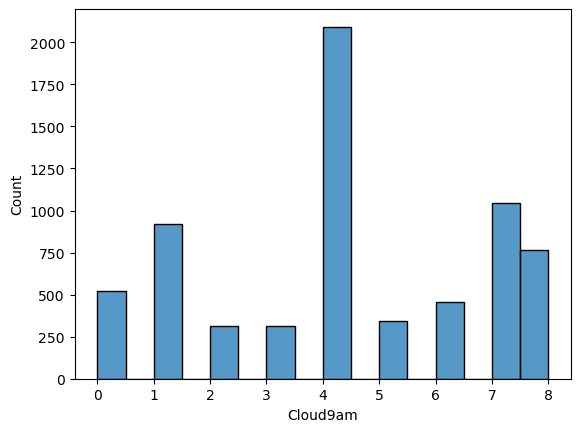

In [168]:
sns.histplot(df['Cloud9am'])

From the above we see that cloud 9am is maximum around 4-5

<Axes: xlabel='Cloud3pm', ylabel='Count'>

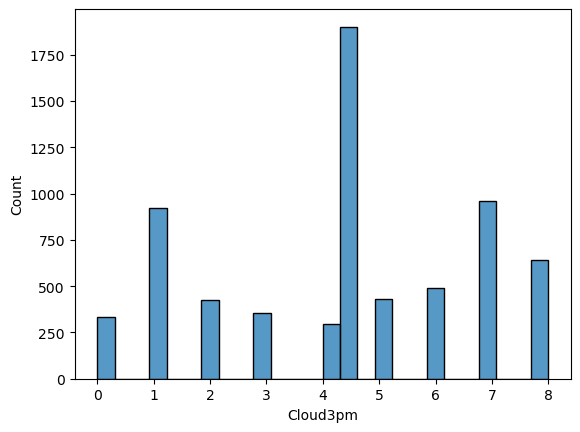

In [169]:
sns.histplot(df['Cloud3pm'])

Here we see that cloud3pm is maximum around 4-5

<Axes: xlabel='Temp9am', ylabel='Count'>

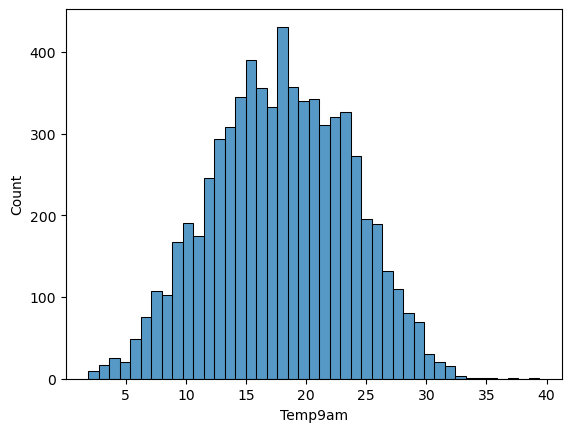

In [170]:
sns.histplot(df['Temp9am'])

From the above we see that Temp9am is maximum around 18

<Axes: xlabel='Temp3pm', ylabel='Count'>

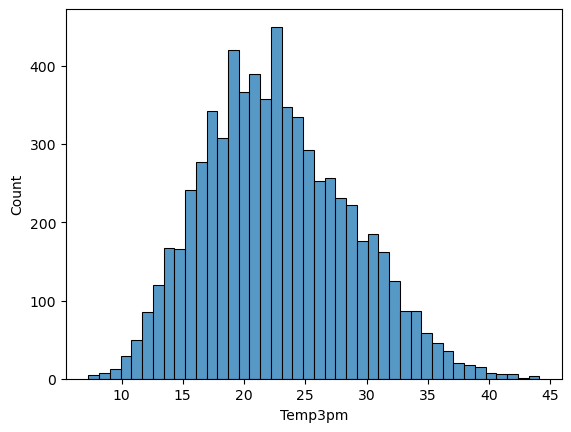

In [171]:
sns.histplot(df['Temp3pm'])

Here we see that Temp3pm is maximum around 23

In [172]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2
df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2
df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2
df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2
df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [173]:
df= df.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)
df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0      Albury     13.4  22.900000       0.6     5.302395  7.890896   
1      Albury      7.4  25.100000       0.0     5.302395  7.890896   
2      Albury     12.9  25.700000       0.0     5.302395  7.890896   
3      Albury      9.2  28.000000       0.0     5.302395  7.890896   
4      Albury     17.5  32.300000       1.0     5.302395  7.890896   
...       ...      ...        ...       ...          ...       ...   
8420    Uluru      2.8  23.400000       0.0     5.302395  7.890896   
8421    Uluru      3.6  25.300000       0.0     5.302395  7.890896   
8422    Uluru      5.4  26.900000       0.0     5.302395  7.890896   
8423    Uluru      7.8  27.000000       0.0     5.302395  7.890896   
8424    Uluru     14.9  24.098345       0.0     5.302395  7.890896   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm RainToday RainTomorrow  \
0              W      44.000000          W        WNW        No           No   
1            WNW      44.000000        NNW        WSW        No           No   
2            WSW      46.000000          W        WSW        No           No   
3             NE      24.000000         SE          E        No           No   
4              W      41.000000        ENE         NW        No           No   
...          ...            ...        ...        ...       ...          ...   
8420           E      31.000000         SE        ENE        No           No   
8421         NNW      22.000000         SE          N        No           No   
8422           N      37.000000         SE        WNW        No           No   
8423          SE      28.000000        SSE          N        No           No   
8424           E      38.977663        ESE        ESE        No           No   

      Day  Month  Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  Avg_Temp  \
0       1     12  2008           22.0          46.5   6.160494     19.35   
1       2     12  2008           13.0          34.5   4.328897     20.75   
2       3     12  2008           22.5          34.0   3.168403     22.10   
3       4     12  2008           10.0          30.5   4.328897     22.30   
4       5     12  2008           13.5          57.5   7.500000     23.75   
...   ...    ...   ...            ...           ...        ...       ...   
8420   21      6  2017           12.0          37.5   4.328897     16.25   
8421   22      6  2017           11.0          38.5   4.328897     17.70   
8422   23      6  2017            9.0          38.5   4.328897     19.30   
8423   24      6  2017           10.0          37.5   2.500000     20.55   
8424   25      6  2017           17.0          49.0   8.000000     17.95   

      Avg_Pressure  
0          1007.40  
1          1009.20  
2          1008.15  
3          1015.20  
4          1008.40  
...            ...  
8420       1022.45  
8421       1021.30  
8422       1018.90  
8423       1017.95  
8424       1019.05  

[6762 rows x 20 columns]

<Axes: xlabel='Avg_WindSpeed', ylabel='Count'>

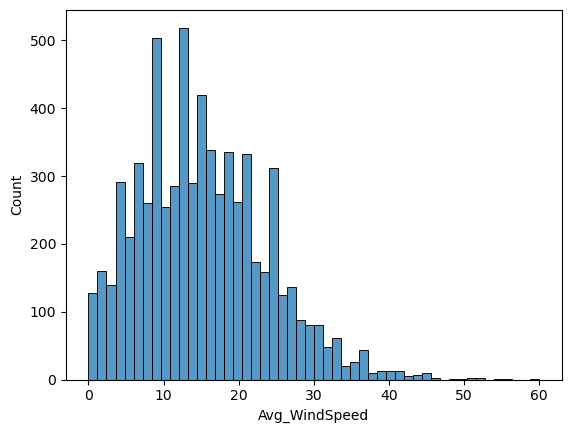

In [40]:
sns.histplot(df['Avg_WindSpeed'])

From the above we see that Avg_WindSpeed is maximum around 12

<Axes: xlabel='Avg_Cloud', ylabel='Count'>

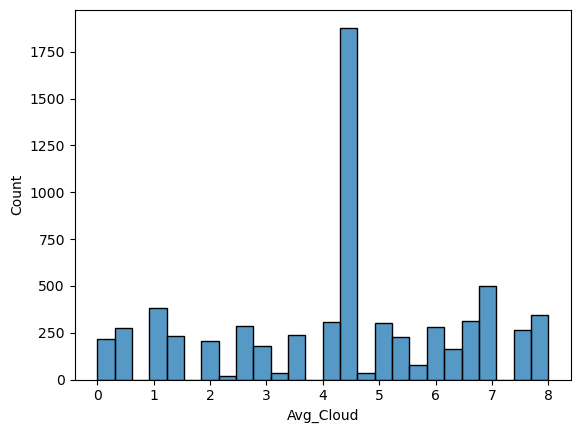

In [41]:
sns.histplot(df['Avg_Cloud'])

From the above we see that Avg_cloud is maximum around 4.5-4.8 less than 5

<Axes: xlabel='Avg_Humidity', ylabel='Count'>

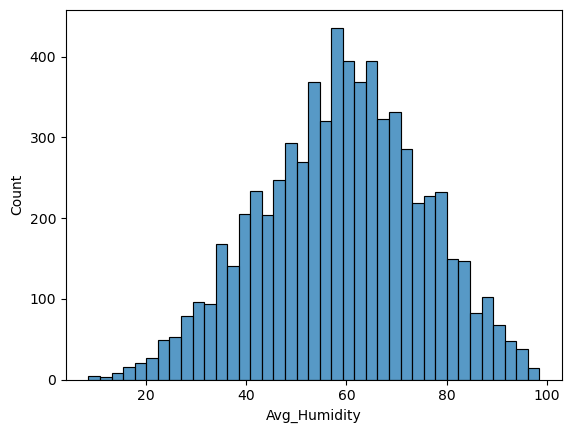

In [42]:
sns.histplot(df['Avg_Humidity'])

From the above we see that Avg_Humdidity is maximum around 63

<Axes: xlabel='Avg_Pressure', ylabel='Count'>

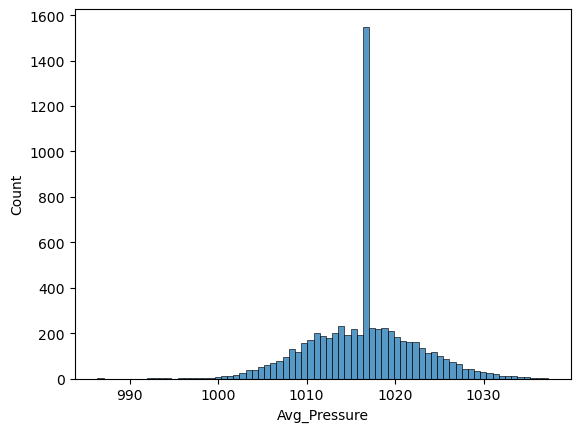

In [43]:
sns.histplot(df['Avg_Pressure'])

From the above we see that Avg_Pressure is maximum around 1016

<Axes: xlabel='Avg_Temp', ylabel='Count'>

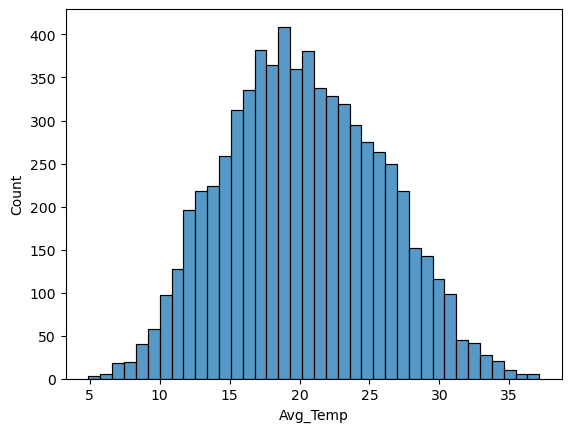

In [44]:
sns.histplot(df['Avg_Temp'])

From the above we see that Avg_Temp is maximum around 20

BiVariate Analysis

<Axes: xlabel='RainTomorrow', ylabel='Avg_Temp'>

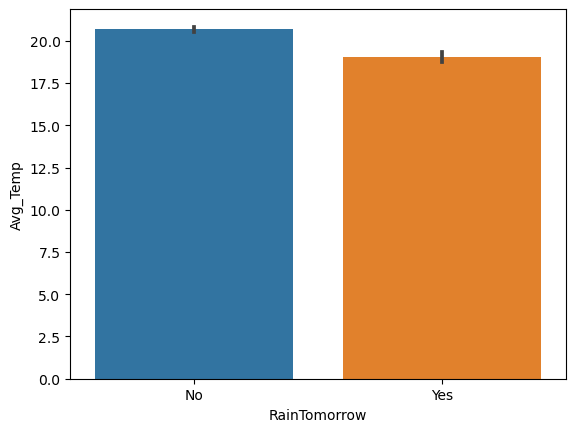

In [45]:
sns.barplot(y='Avg_Temp', x='RainTomorrow', data = df)

From the above graph we can see that at Avg_Temp there will not be any Rain Tomorrow

<Axes: xlabel='RainTomorrow', ylabel='Avg_Pressure'>

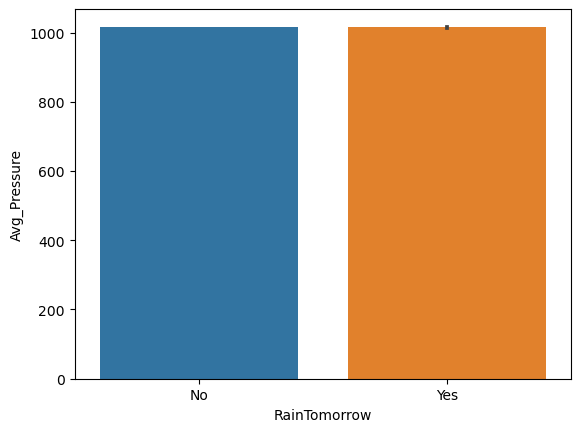

In [46]:
sns.barplot(y='Avg_Pressure', x='RainTomorrow', data = df)

From the above we see that at Avg_Pressure possibility of having RainTomorrow cannot be predicted as it is same for yes or no

<Axes: xlabel='RainTomorrow', ylabel='Avg_Cloud'>

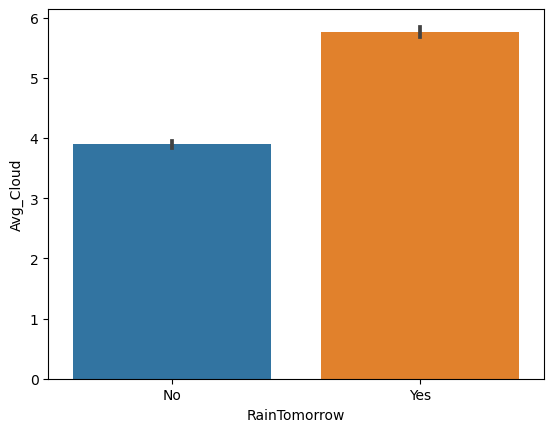

In [47]:
sns.barplot(y='Avg_Cloud', x='RainTomorrow', data = df)

From the above we see that at Avg_cloud there will be Rain Tomorrow

<Axes: xlabel='RainTomorrow', ylabel='Avg_Humidity'>

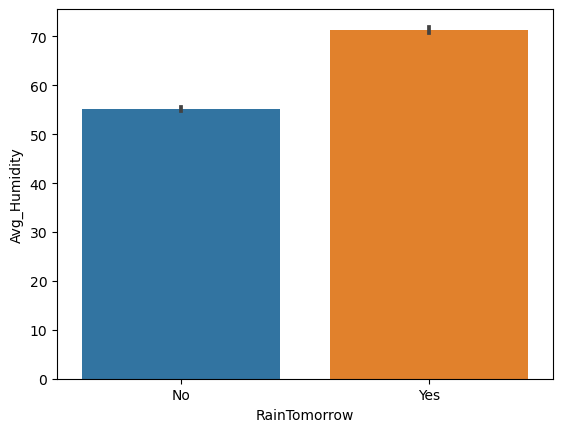

In [48]:
sns.barplot(y='Avg_Humidity', x='RainTomorrow', data = df)

From the above we see that at Avg_Humidity possiblity of having Rain Tomorrow is more for yes

<Axes: xlabel='RainTomorrow', ylabel='Avg_WindSpeed'>

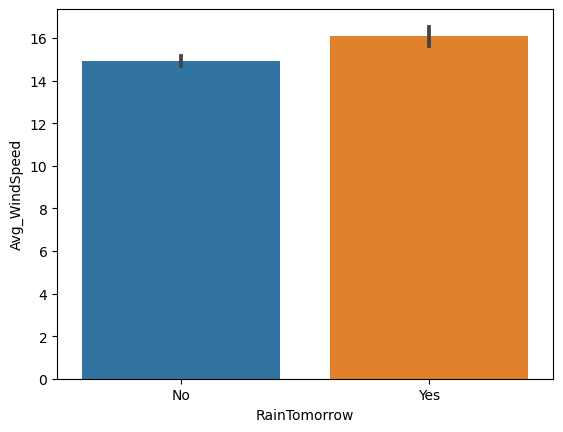

In [49]:
sns.barplot(y='Avg_WindSpeed', x='RainTomorrow', data = df)

From the above we see that at Avg_windSpeed possibility of having Rain Tomorrow is more of Yes  

<Axes: xlabel='RainTomorrow', ylabel='Year'>

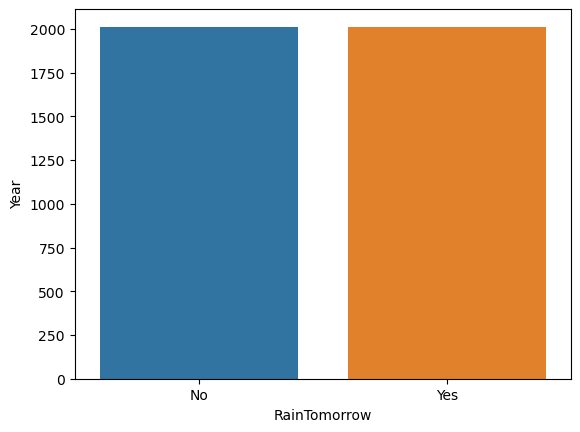

In [50]:
sns.barplot(y='Year', x='RainTomorrow', data = df)

From the above we see that Year cannot tell whether there will be Rain Tomorrow or not as possibility of having it is same for both yes and no

<Axes: xlabel='RainTomorrow', ylabel='Month'>

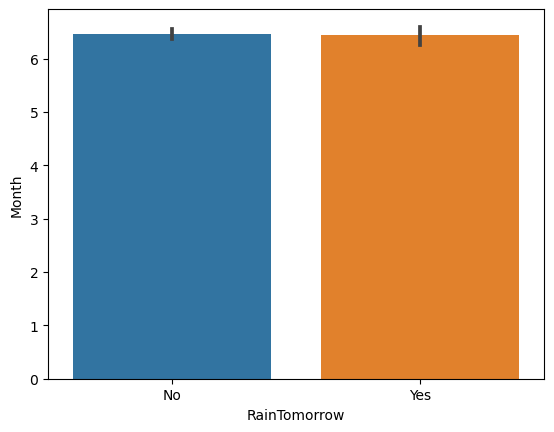

In [51]:
sns.barplot(y='Month', x='RainTomorrow', data = df)

From the above we see that Month cannot tell whether there will be Rain Tomorrow or not as possibility of having it is same for both yes and no

<Axes: xlabel='RainTomorrow', ylabel='Day'>

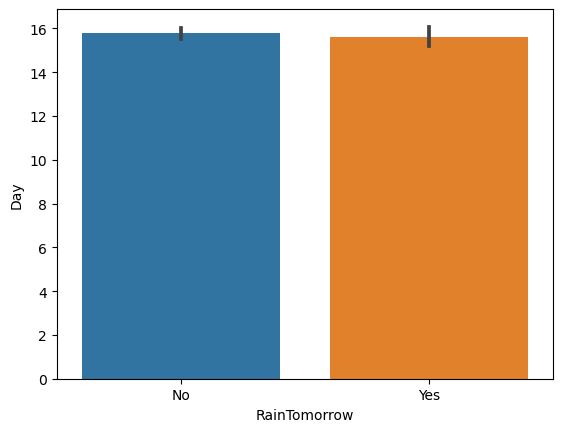

In [52]:
sns.barplot(y='Day', x='RainTomorrow', data = df)

From the above we see that Day cannot tell whether there will be Rain Tomorrow or not as possibility of having it is same for both yes and no

<Axes: xlabel='RainTomorrow', ylabel='WindGustSpeed'>

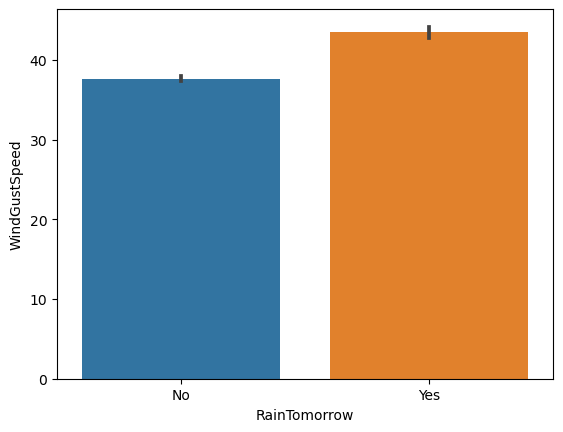

In [53]:
sns.barplot(y='WindGustSpeed', x='RainTomorrow', data = df)

From the above we see that at WindGustSpeed possibility of having Rain Tomorrow is yes 

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

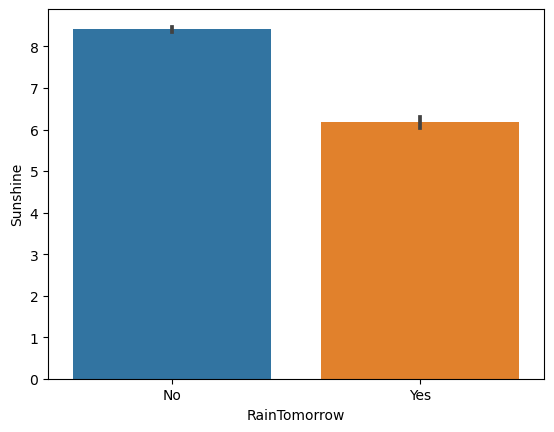

In [54]:
sns.barplot(y='Sunshine', x='RainTomorrow', data = df)

From the above we see that at Sunshine possibility of having Rain Tomorrow is more of yes

<Axes: xlabel='RainTomorrow', ylabel='Evaporation'>

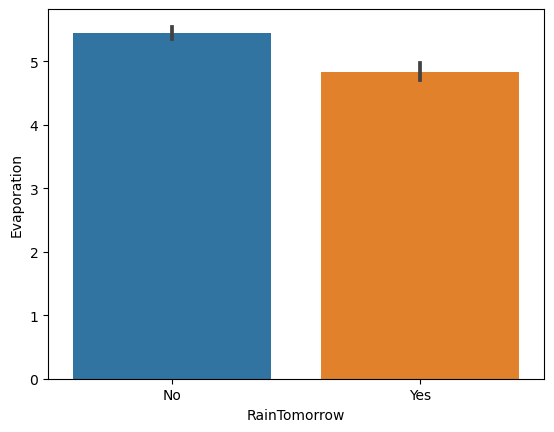

In [55]:
sns.barplot(y='Evaporation', x='RainTomorrow', data = df)

From the above we see that at Evaporation the possibilty of having Rain Tomorrow is more of no

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

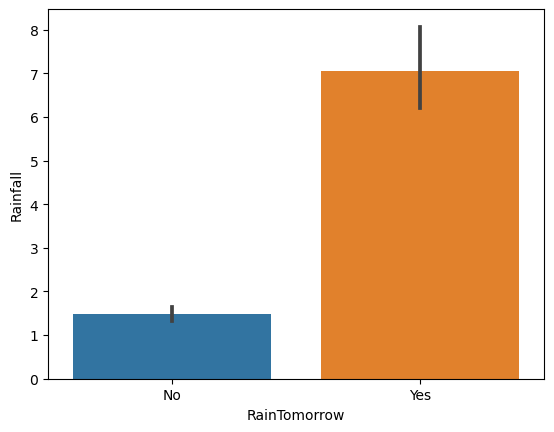

In [56]:
sns.barplot(y='Rainfall', x='RainTomorrow', data = df)

From the above we se that Rainfall is directly related to the possibility of having Rain Tomorrow

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

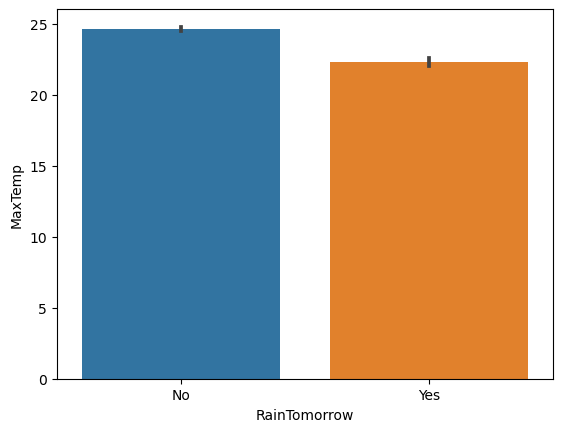

In [57]:
sns.barplot(y='MaxTemp', x='RainTomorrow', data = df)

From the above we see that at MaxTemp the possibilty of having Rain Tomorrow is more of no than yes

<Axes: xlabel='RainToday', ylabel='MinTemp'>

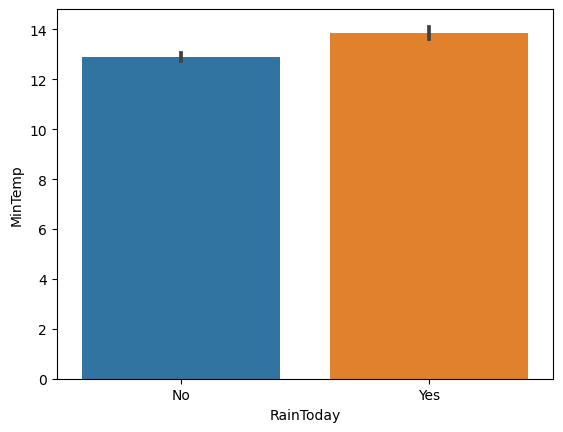

In [58]:
sns.barplot(y='MinTemp', x='RainToday', data = df)

From the above we see that the possibilty of having Rain Tomorrow at MinTemp is more of yes

MultiVariate Analysis

In [349]:
sns.pairplot(df)

In [174]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
categorical = df.select_dtypes(include=['object']).columns
categorical
for i in categorical:
    df[i] = LE.fit_transform(df[i])

In [175]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [176]:
x.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
RainToday         1.266937
Day               0.006240
Month             0.021988
Year              0.354481
Avg_WindSpeed     0.649328
Avg_Humidity     -0.151549
Avg_Cloud        -0.243264
Avg_Temp          0.130415
Avg_Pressure      0.054933
dtype: float64

In [177]:
features = ['Rainfall','Evaporation','WindGustSpeed','Sunshine','Avg_WindSpeed']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x[features] = scaler.fit_transform(x[features].values)

In [131]:
x.skew()

Date              0.324136
Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.266937
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64

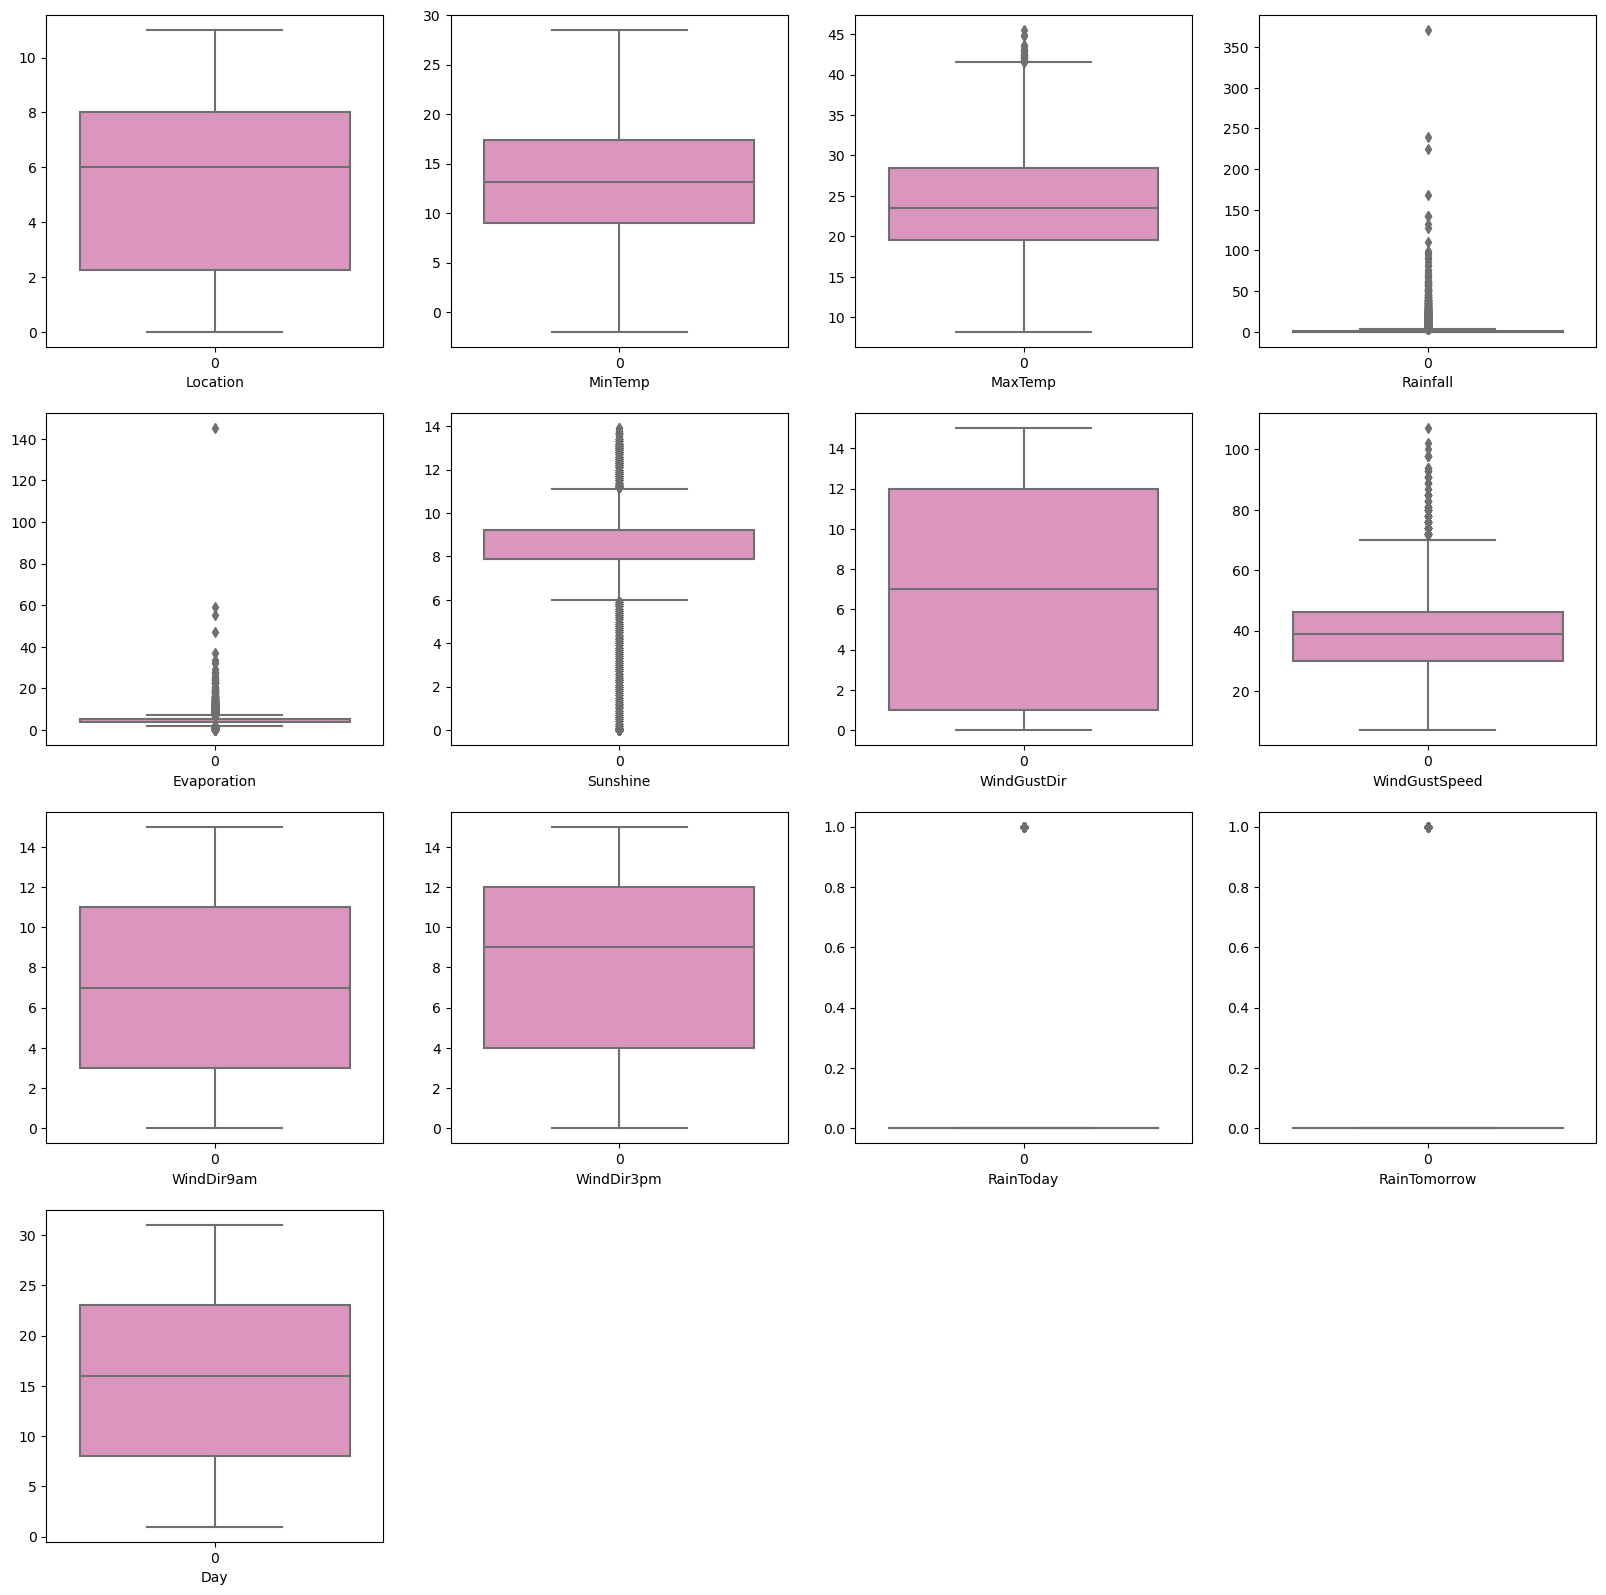

In [178]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [179]:
features = df[['Evaporation','Sunshine','RainToday','RainTomorrow','Rainfall','MaxTemp']]
from scipy.stats import zscore
z=np.abs(zscore(features))
df = df[(z<3).all(axis=1)]
df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.302395  7.890896   
1            1      7.4  25.100000       0.0     5.302395  7.890896   
2            1     12.9  25.700000       0.0     5.302395  7.890896   
3            1      9.2  28.000000       0.0     5.302395  7.890896   
4            1     17.5  32.300000       1.0     5.302395  7.890896   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.302395  7.890896   
8421         9      3.6  25.300000       0.0     5.302395  7.890896   
8422         9      5.4  26.900000       0.0     5.302395  7.890896   
8423         9      7.8  27.000000       0.0     5.302395  7.890896   
8424         9     14.9  24.098345       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday  \
0              13      44.000000          13          14          0   
1              14      44.000000           6          15          0   
2              15      46.000000          13          15          0   
3               4      24.000000           9           0          0   
4              13      41.000000           1           7          0   
...           ...            ...         ...         ...        ...   
8420            0      31.000000           9           1          0   
8421            6      22.000000           9           3          0   
8422            3      37.000000           9          14          0   
8423            9      28.000000          10           3          0   
8424            0      38.977663           2           2          0   

      RainTomorrow  Day  Month  Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  \
0                0    1     12  2008           22.0          46.5   6.160494   
1                0    2     12  2008           13.0          34.5   4.328897   
2                0    3     12  2008           22.5          34.0   3.168403   
3                0    4     12  2008           10.0          30.5   4.328897   
4                0    5     12  2008           13.5          57.5   7.500000   
...            ...  ...    ...   ...            ...           ...        ...   
8420             0   21      6  2017           12.0          37.5   4.328897   
8421             0   22      6  2017           11.0          38.5   4.328897   
8422             0   23      6  2017            9.0          38.5   4.328897   
8423             0   24      6  2017           10.0          37.5   2.500000   
8424             0   25      6  2017           17.0          49.0   8.000000   

      Avg_Temp  Avg_Pressure  
0        19.35       1007.40  
1        20.75       1009.20  
2        22.10       1008.15  
3        22.30       1015.20  
4        23.75       1008.40  
...        ...           ...  
8420     16.25       1022.45  
8421     17.70       1021.30  
8422     19.30       1018.90  
8423     20.55       1017.95  
8424     17.95       1019.05  

[6601 rows x 20 columns]

In [180]:
data_loss =(6762-6601)/6762*100
data_loss

2.380952380952381

In [181]:
cor=df.corr()
cor

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.093892  0.071429  0.010146     0.130466  0.058170   
MinTemp        0.093892  1.000000  0.731169  0.096082     0.371471  0.048512   
MaxTemp        0.071429  0.731169  1.000000 -0.141856     0.479924  0.358287   
Rainfall       0.010146  0.096082 -0.141856  1.000000    -0.111802 -0.192583   
Evaporation    0.130466  0.371471  0.479924 -0.111802     1.000000  0.394747   
Sunshine       0.058170  0.048512  0.358287 -0.192583     0.394747  1.000000   
WindGustDir   -0.086922 -0.138922 -0.199981  0.081179    -0.138480 -0.098208   
WindGustSpeed  0.264685  0.237460  0.162733  0.093011     0.218620  0.018523   
WindDir9am    -0.095391 -0.022504 -0.194103  0.122576    -0.140307 -0.077805   
WindDir3pm     0.000078 -0.138386 -0.159599  0.073485    -0.029372 -0.054524   
RainToday     -0.003807  0.068315 -0.222179  0.693017    -0.178222 -0.238262   
RainTomorrow   0.000207  0.091308 -0.157656  0.279622    -0.107787 -0.336219   
Day           -0.003468  0.015242  0.016041 -0.008533     0.008699 -0.000115   
Month         -0.070981 -0.233918 -0.171266  0.000155    -0.059071 -0.007363   
Year           0.497399  0.034080  0.081866  0.002628     0.106825  0.056794   
Avg_WindSpeed  0.267264  0.202962  0.098555  0.036849     0.170679  0.040183   
Avg_Humidity  -0.019642 -0.047393 -0.468775  0.337141    -0.338477 -0.448022   
Avg_Cloud     -0.006102  0.074798 -0.270961  0.249346    -0.160454 -0.612876   
Avg_Temp       0.086837  0.829071  0.962362 -0.097845     0.471885  0.324791   
Avg_Pressure  -0.030031 -0.443949 -0.376950 -0.098852    -0.289602 -0.033525   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday  \
Location         -0.086922       0.264685   -0.095391    0.000078  -0.003807   
MinTemp          -0.138922       0.237460   -0.022504   -0.138386   0.068315   
MaxTemp          -0.199981       0.162733   -0.194103   -0.159599  -0.222179   
Rainfall          0.081179       0.093011    0.122576    0.073485   0.693017   
Evaporation      -0.138480       0.218620   -0.140307   -0.029372  -0.178222   
Sunshine         -0.098208       0.018523   -0.077805   -0.054524  -0.238262   
WindGustDir       1.000000       0.006679    0.379589    0.455484   0.115396   
WindGustSpeed     0.006679       1.000000   -0.077132    0.079830   0.077839   
WindDir9am        0.379589      -0.077132    1.000000    0.213807   0.151730   
WindDir3pm        0.455484       0.079830    0.213807    1.000000   0.096048   
RainToday         0.115396       0.077839    0.151730    0.096048   1.000000   
RainTomorrow      0.043383       0.179649    0.035633    0.003736   0.308087   
Day               0.014586      -0.003667   -0.011055    0.002627  -0.007812   
Month             0.031633       0.054266    0.019963    0.031982   0.001033   
Year             -0.180816      -0.027556   -0.072091    0.009457  -0.012619   
Avg_WindSpeed     0.110291       0.687574    0.057537    0.055861   0.021450   
Avg_Humidity      0.022460      -0.206864    0.074232   -0.009124   0.406074   
Avg_Cloud         0.110359       0.033431    0.072138    0.069277   0.297880   
Avg_Temp         -0.192355       0.179428   -0.143228   -0.165400  -0.170990   
Avg_Pressure     -0.058970      -0.378655    0.014226   -0.092487  -0.077881   

               RainTomorrow       Day     Month      Year  Avg_WindSpeed  \
Location           0.000207 -0.003468 -0.070981  0.497399       0.267264   
MinTemp            0.091308  0.015242 -0.233918  0.034080       0.202962   
MaxTemp           -0.157656  0.016041 -0.171266  0.081866       0.098555   
Rainfall           0.279622 -0.008533  0.000155  0.002628       0.036849   
Evaporation       -0.107787  0.008699 -0.059071  0.106825       0.170679   
Sunshine          -0.336219 -0.000115 -0.007363  0.056794       0.040183   
WindGustDir        0.043383  0.014586  0.031633 -0.180816       0.110291   
WindGustSpeed      0.179649 -0.003667  0.0542

<Axes: >

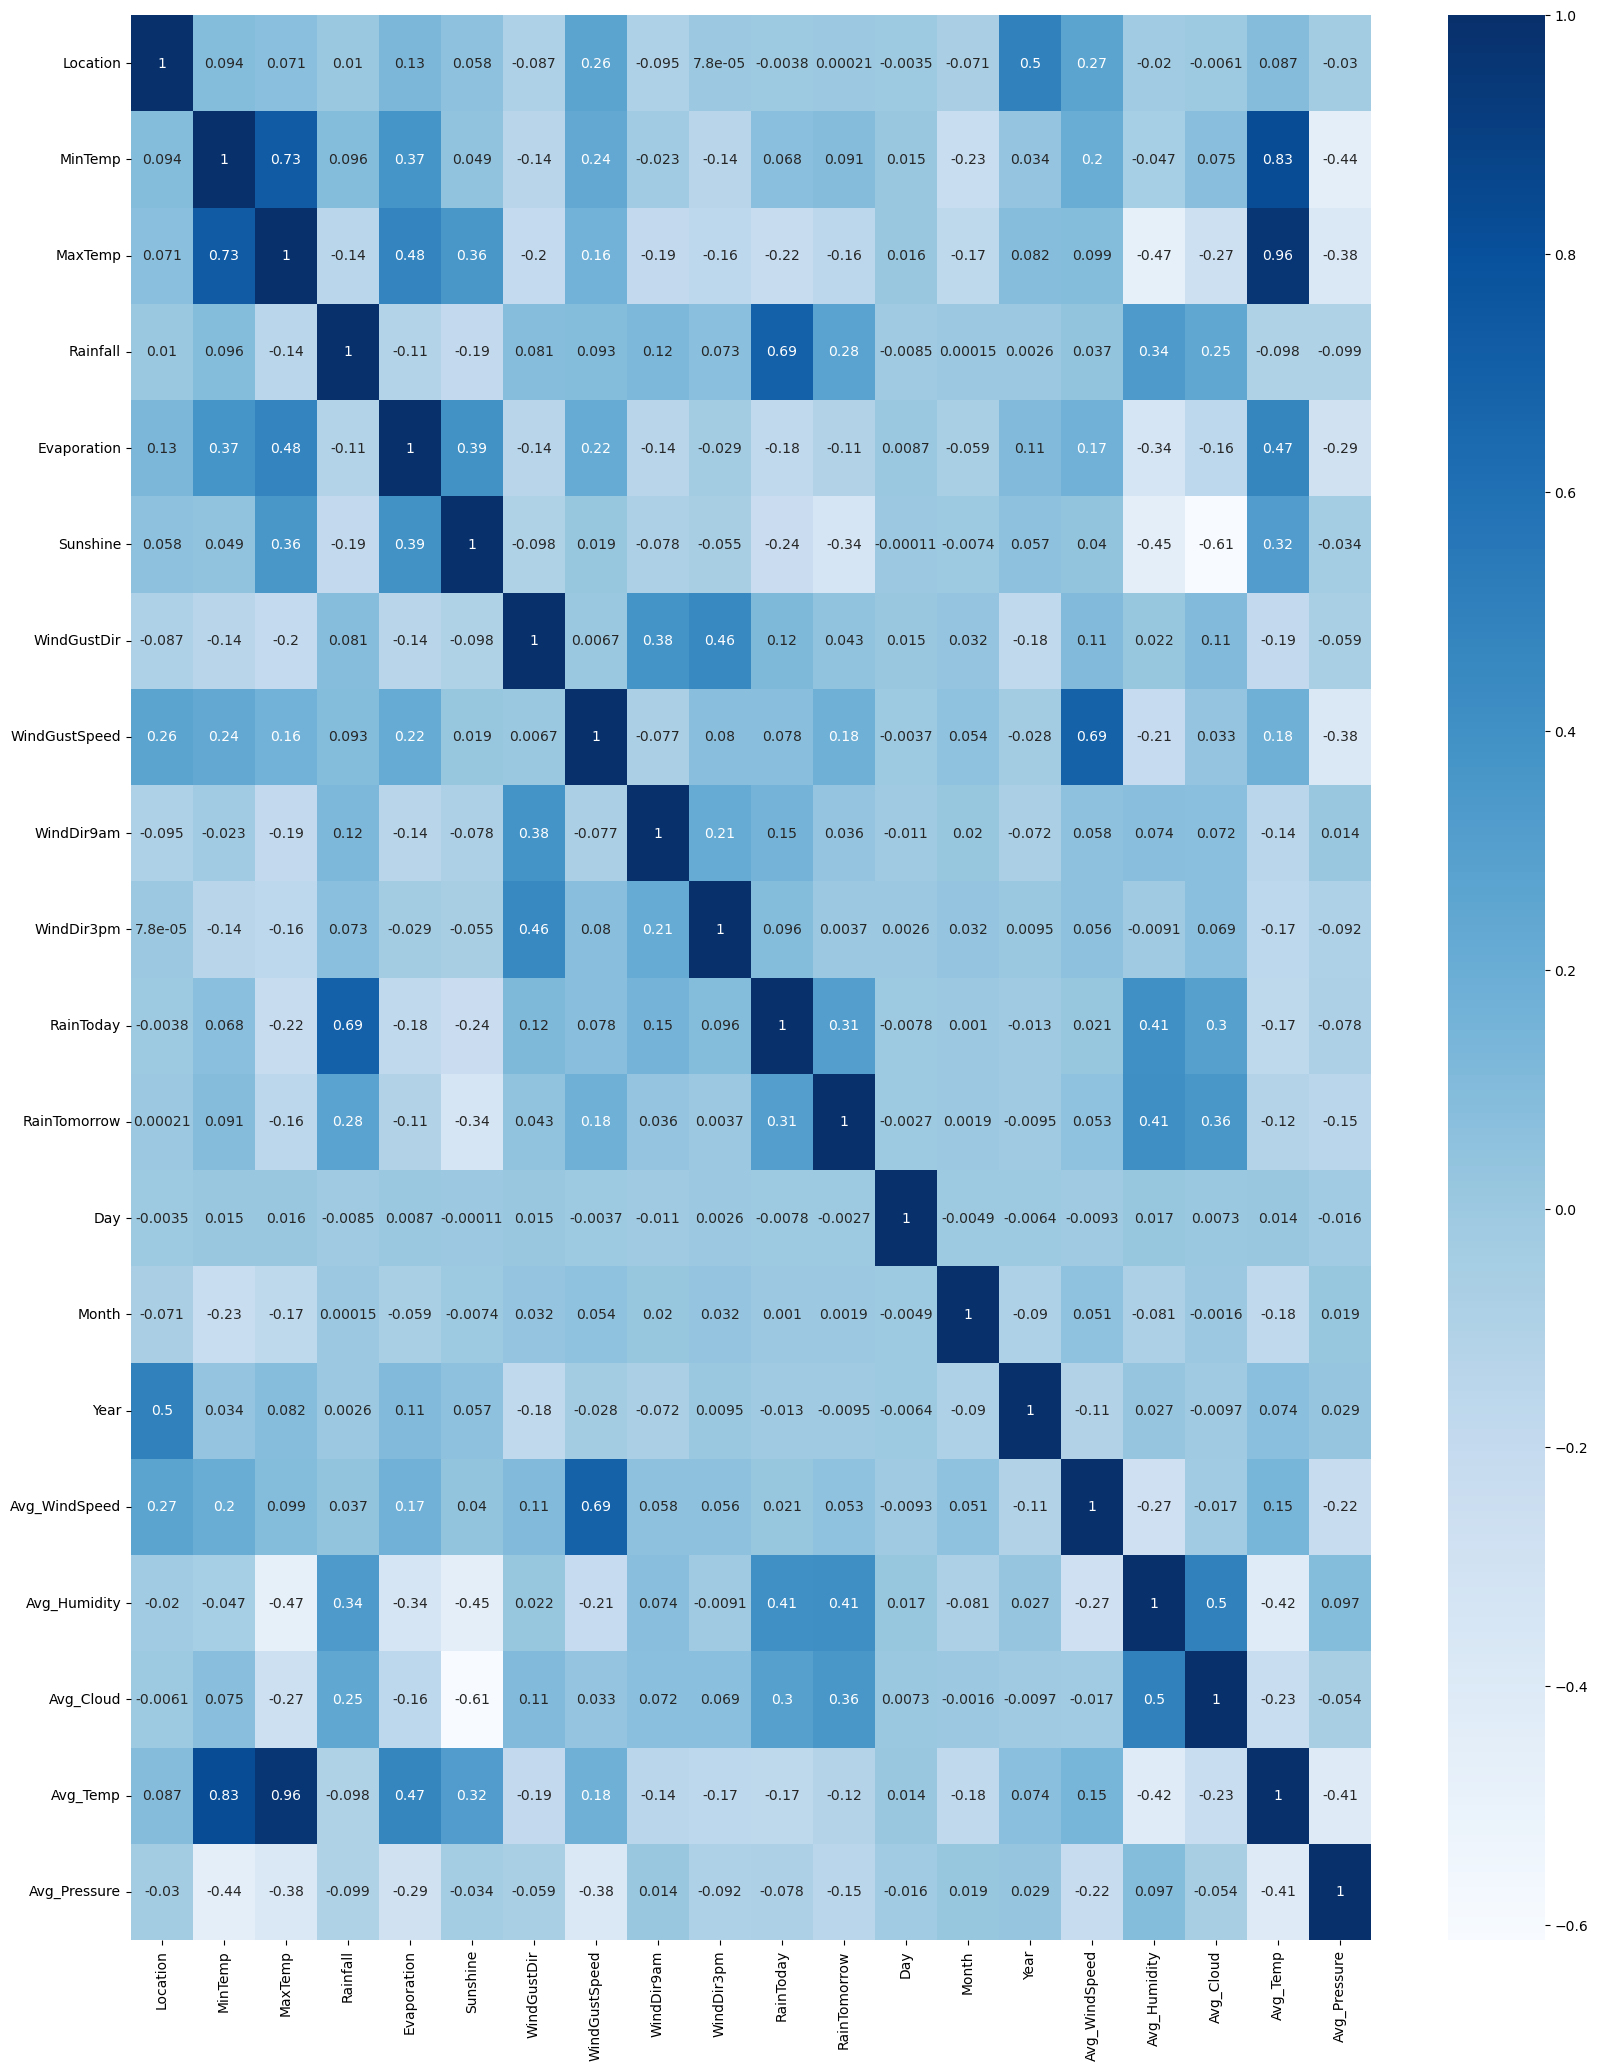

In [182]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot = True,cmap='Blues')

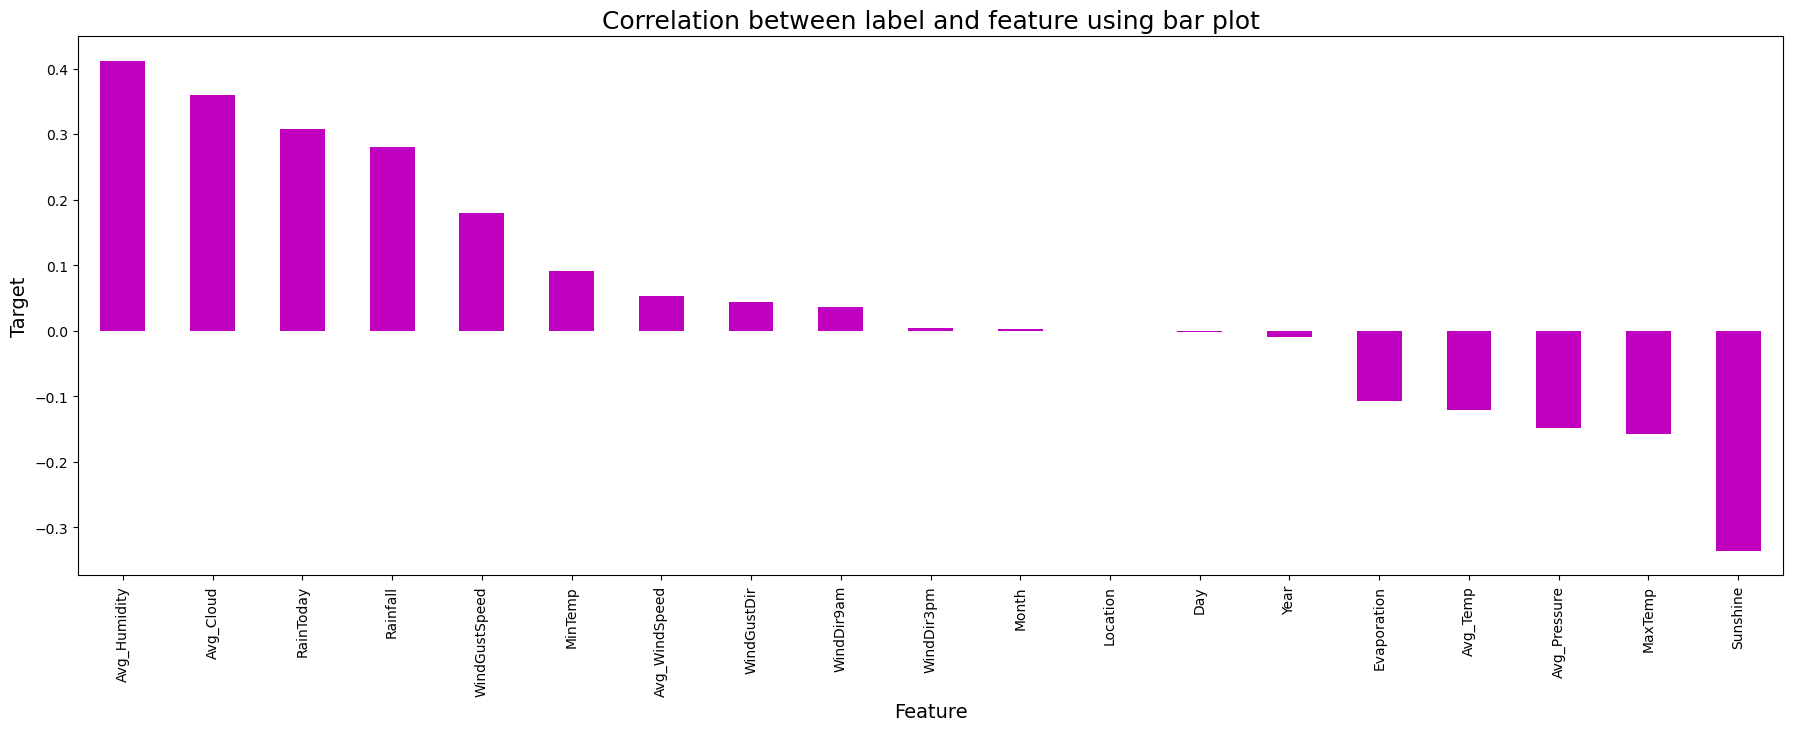

In [183]:
plt.figure(figsize=(22,7))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the above correlation graph we see that Avg_Humidity is positively correlated with Target and Sunshine is negatively correlated with the target and columns WindDir3pm,Month and Day are very less correlated with target and column Location is not related with target at all

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Location   MinTemp       MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.395097  0.052498 -1.954990e-01  0.592756      0.17104 -0.099351   
1    -1.395097 -1.030484  1.634110e-01 -0.681888      0.17104 -0.099351   
2    -1.395097 -0.037750  2.612956e-01 -0.681888      0.17104 -0.099351   
3    -1.395097 -0.705589  6.365197e-01 -0.681888      0.17104 -0.099351   
4    -1.395097  0.792536  1.338026e+00  0.950465      0.17104 -0.099351   
...        ...       ...           ...       ...          ...       ...   
6757  1.186193 -1.860770 -1.139286e-01 -0.681888      0.17104 -0.099351   
6758  1.186193 -1.716373  1.960392e-01 -0.681888      0.17104 -0.099351   
6759  1.186193 -1.391478  4.570647e-01 -0.681888      0.17104 -0.099351   
6760  1.186193 -0.958285  4.733788e-01 -0.681888      0.17104 -0.099351   
6761  1.186193  0.323244 -5.795930e-16 -0.681888      0.17104 -0.099351   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday       Day  \
0        1.220923       0.470420    1.315650    1.372365  -0.550355 -1.675969   
1        1.412005       0.470420   -0.222688    1.595253  -0.550355 -1.562245   
2        1.603087       0.607493    1.315650    1.595253  -0.550355 -1.448521   
3       -0.498814      -1.189815    0.436600   -1.748064  -0.550355 -1.334798   
4        1.220923       0.257219   -1.321500   -0.187849  -0.550355 -1.221074   
...           ...            ...         ...         ...        ...       ...   
6757    -1.263141      -0.534275    0.436600   -1.525176  -0.550355  0.598504   
6758    -0.116650      -1.398629    0.436600   -1.079401  -0.550355  0.712227   
6759    -0.689895      -0.042965    0.436600    1.372365  -0.550355  0.825951   
6760     0.456596      -0.802557    0.656363   -1.079401  -0.550355  0.939675   
6761    -1.263141       0.107878   -1.101738   -1.302289  -0.550355  1.053398   

         Month      Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  Avg_Temp  \
0     1.639768 -1.761148       0.840877     -0.772994   0.854928 -0.169993   
1     1.639768 -1.761148      -0.134262     -1.515849   0.000000  0.080050   
2     1.639768 -1.761148       0.889593     -1.546801  -0.541679  0.321162   
3     1.639768 -1.761148      -0.518204     -1.763467   0.000000  0.356883   
4     1.639768 -1.761148      -0.073923     -0.092043   1.480164  0.615856   
...        ...       ...            ...           ...        ...       ...   
6757 -0.136841  2.150387      -0.257840     -1.330135   0.000000 -0.723660   
6758 -0.136841  2.150387      -0.385648     -1.268231   0.000000 -0.464687   
6759 -0.136841  2.150387      -0.656141     -1.268231   0.000000 -0.178923   
6760 -0.136841  2.150387      -0.518204     -1.330135  -0.853667  0.044329   
6761 -0.136841  2.150387       0.325364     -0.618232   1.713547 -0.420036   

      Avg_Pressure  
0        -1.510192  
1        -1.207248  
2        -1.383965  
3        -0.197438  
4        -1.341890  
...            ...  
6757      1.022750  
6758      0.829203  
6759      0.425279  
6760      0.265392  
6761      0.450524  

[6762 rows x 19 columns]

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.622323       Location
1     7.688386        MinTemp
2    18.127586        MaxTemp
3     5.745359       Rainfall
4     1.494543    Evaporation
5     2.080605       Sunshine
6     1.544405    WindGustDir
7     2.220960  WindGustSpeed
8     1.290387     WindDir9am
9     1.350843     WindDir3pm
10    5.269023      RainToday
11    1.002643            Day
12    1.113654          Month
13    1.552616           Year
14    2.250902  Avg_WindSpeed
15    2.709964   Avg_Humidity
16    2.058489      Avg_Cloud
17   30.249461       Avg_Temp
18    1.492367   Avg_Pressure

The column Max_Temp and Avg_Temp are having strong correlation between them,therefore we reed to remove one column in order to reduce mulitcollinearity.

In [186]:
x = x.drop(['Avg_Temp'], axis=1)

We have dropped Avg_Temp column now checking vif again

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.620267       Location
1     3.991160        MinTemp
2     4.873892        MaxTemp
3     5.734852       Rainfall
4     1.489700    Evaporation
5     2.062012       Sunshine
6     1.543806    WindGustDir
7     2.185687  WindGustSpeed
8     1.290288     WindDir9am
9     1.349324     WindDir3pm
10    5.263969      RainToday
11    1.002643            Day
12    1.108768          Month
13    1.550633           Year
14    2.246151  Avg_WindSpeed
15    2.559430   Avg_Humidity
16    2.035067      Avg_Cloud
17    1.489258   Avg_Pressure

Now all the columns are under Vif range and data is free from Multicollinearity now

In [74]:
y.value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [76]:
y.value_counts()

0    5190
1    5190
Name: RainTomorrow, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [78]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  78.67694283879256 on Random_state  81


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [80]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8978805394990366
Confusion Matrix:  [[1380  165]
 [ 153 1416]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.89      0.90      1545
           1       0.90      0.90      0.90      1569

    accuracy                           0.90      3114
   macro avg       0.90      0.90      0.90      3114
weighted avg       0.90      0.90      0.90      3114



In [81]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.7867694283879255
Confusion Matrix:  [[1228  317]
 [ 347 1222]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.79      0.79      1545
           1       0.79      0.78      0.79      1569

    accuracy                           0.79      3114
   macro avg       0.79      0.79      0.79      3114
weighted avg       0.79      0.79      0.79      3114



In [82]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8448940269749519
Confusion Matrix:  [[1151  394]
 [  89 1480]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.74      0.83      1545
           1       0.79      0.94      0.86      1569

    accuracy                           0.84      3114
   macro avg       0.86      0.84      0.84      3114
weighted avg       0.86      0.84      0.84      3114



In [83]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8660886319845857
Confusion Matrix:  [[1362  183]
 [ 234 1335]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.88      0.87      1545
           1       0.88      0.85      0.86      1569

    accuracy                           0.87      3114
   macro avg       0.87      0.87      0.87      3114
weighted avg       0.87      0.87      0.87      3114



In [84]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8012202954399487
Confusion Matrix:  [[1255  290]
 [ 329 1240]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.81      0.80      1545
           1       0.81      0.79      0.80      1569

    accuracy                           0.80      3114
   macro avg       0.80      0.80      0.80      3114
weighted avg       0.80      0.80      0.80      3114



In [85]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.821451509312781
Confusion Matrix:  [[1277  268]
 [ 288 1281]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.83      0.82      1545
           1       0.83      0.82      0.82      1569

    accuracy                           0.82      3114
   macro avg       0.82      0.82      0.82      3114
weighted avg       0.82      0.82      0.82      3114



In [86]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8683365446371226
Confusion Matrix:  [[1367  178]
 [ 232 1337]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.88      0.87      1545
           1       0.88      0.85      0.87      1569

    accuracy                           0.87      3114
   macro avg       0.87      0.87      0.87      3114
weighted avg       0.87      0.87      0.87      3114



In [87]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.61030829 0.52312139 0.61753372 0.76541426 0.85549133]
0.674373795761079
Difference between accuracy score and cross validation score is:  0.1939627488760436


In [88]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.68689788 0.62764933 0.62716763 0.74421965 0.82899807]
0.7029865125240848
Difference between accuracy score and cross validation score is:  0.16535003211303778


In [89]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.61897881 0.5322736  0.65606936 0.75144509 0.76589595]
0.664932562620424
Difference between accuracy score and cross validation score is:  0.20340398201669863


In [90]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.58333333 0.43400771 0.59344894 0.65414258 0.77408478]
0.6078034682080925
Difference between accuracy score and cross validation score is:  0.2605330764290301


In [91]:
score4=cross_val_score(DTC,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.58911368 0.4566474  0.58622351 0.69942197 0.70231214]
0.6067437379576107
Difference between accuracy score and cross validation score is:  0.2615928066795119


In [92]:
score5=cross_val_score(ADA,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.56984586 0.42870906 0.56262042 0.64643545 0.72398844]
0.5863198458574181
Difference between accuracy score and cross validation score is:  0.2820166987797045


In [93]:
score6=cross_val_score(BG,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score6.mean()))

[0.61705202 0.49662813 0.59971098 0.73458574 0.80876686]
0.6513487475915222
Difference between accuracy score and cross validation score is:  0.21698779704560045


I am choosing RandomForestClassifier as the best working model 

In [94]:
param_grid = {'n_estimators':[100], 
              'criterion':['gini'], 
              'max_depth':[None], 
              'min_samples_split':[2], 
              'min_samples_leaf':[1], 
              'min_weight_fraction_leaf':[0.0], 
              'max_features':['sqrt'], 
              'max_leaf_nodes':[None], 
              'min_impurity_decrease':[0.0], 
              'bootstrap':[True], 
              'oob_score':[False], 
              'n_jobs':[None], 
              'random_state':[None], 
              'verbose':[0], 
              'warm_start':[False], 'class_weight':[None], 'ccp_alpha':[0.0], 'max_samples':[None]
             }

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
GSCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=18)

In [97]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=18, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [98]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
final = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.9039820166987798


As we can see the accuracy is increased from 89.788% to 90.39%  so saving our model

In [100]:
import joblib
joblib.dump(final, "Rainfall Prediction.pkl")

['Rainfall Prediction.pkl']

In [101]:
model = joblib.load("Rainfall Prediction.pkl")
prediction=final.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 1, 1])

In [102]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
0             0         0
1             0         0
2             1         1
3             1         1
4             1         1
...         ...       ...
3109          0         0
3110          0         1
3111          1         1
3112          1         1
3113          1         1

[3114 rows x 2 columns]

In [103]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     0     1     1     1     0     0     1     0     0  ...   
Original      0     0     1     1     1     0     0     1     0     0  ...   

           3104  3105  3106  3107  3108  3109  3110  3111  3112  3113  
Predicted     0     1     0     0     1     0     0     1     1     1  
Original      0     1     0     0     1     0     1     1     1     1  

[2 rows x 3114 columns]

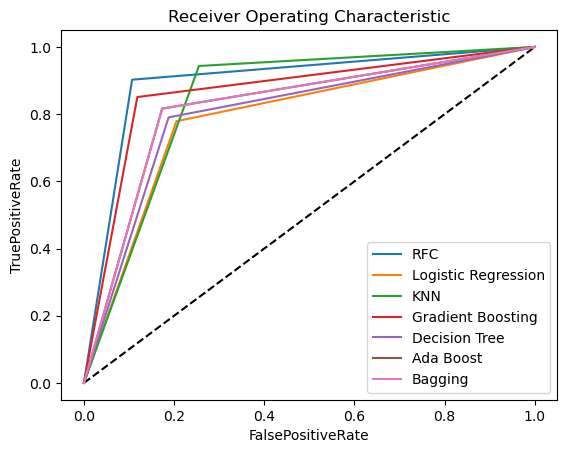

In [104]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = knn.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = DTC.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = ADA.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = BG.predict(x_test)
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Decision Tree")
plt.plot(fpr6, tpr6, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

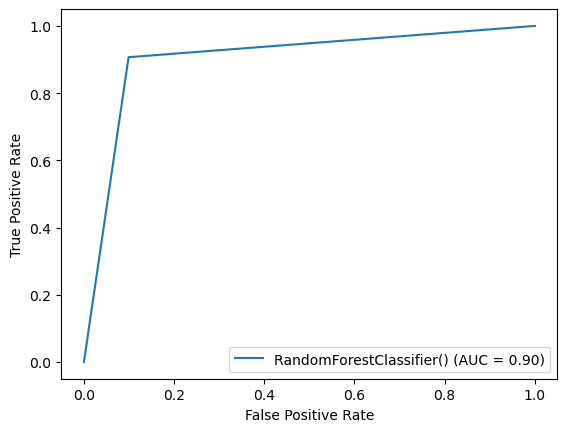

In [105]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

Prediction for Rainfall

In [188]:
x_r = pd.concat([x,y],axis=1)

In [189]:
x_r = x.drop(['Rainfall'], axis=1)
y_r = x['Rainfall']

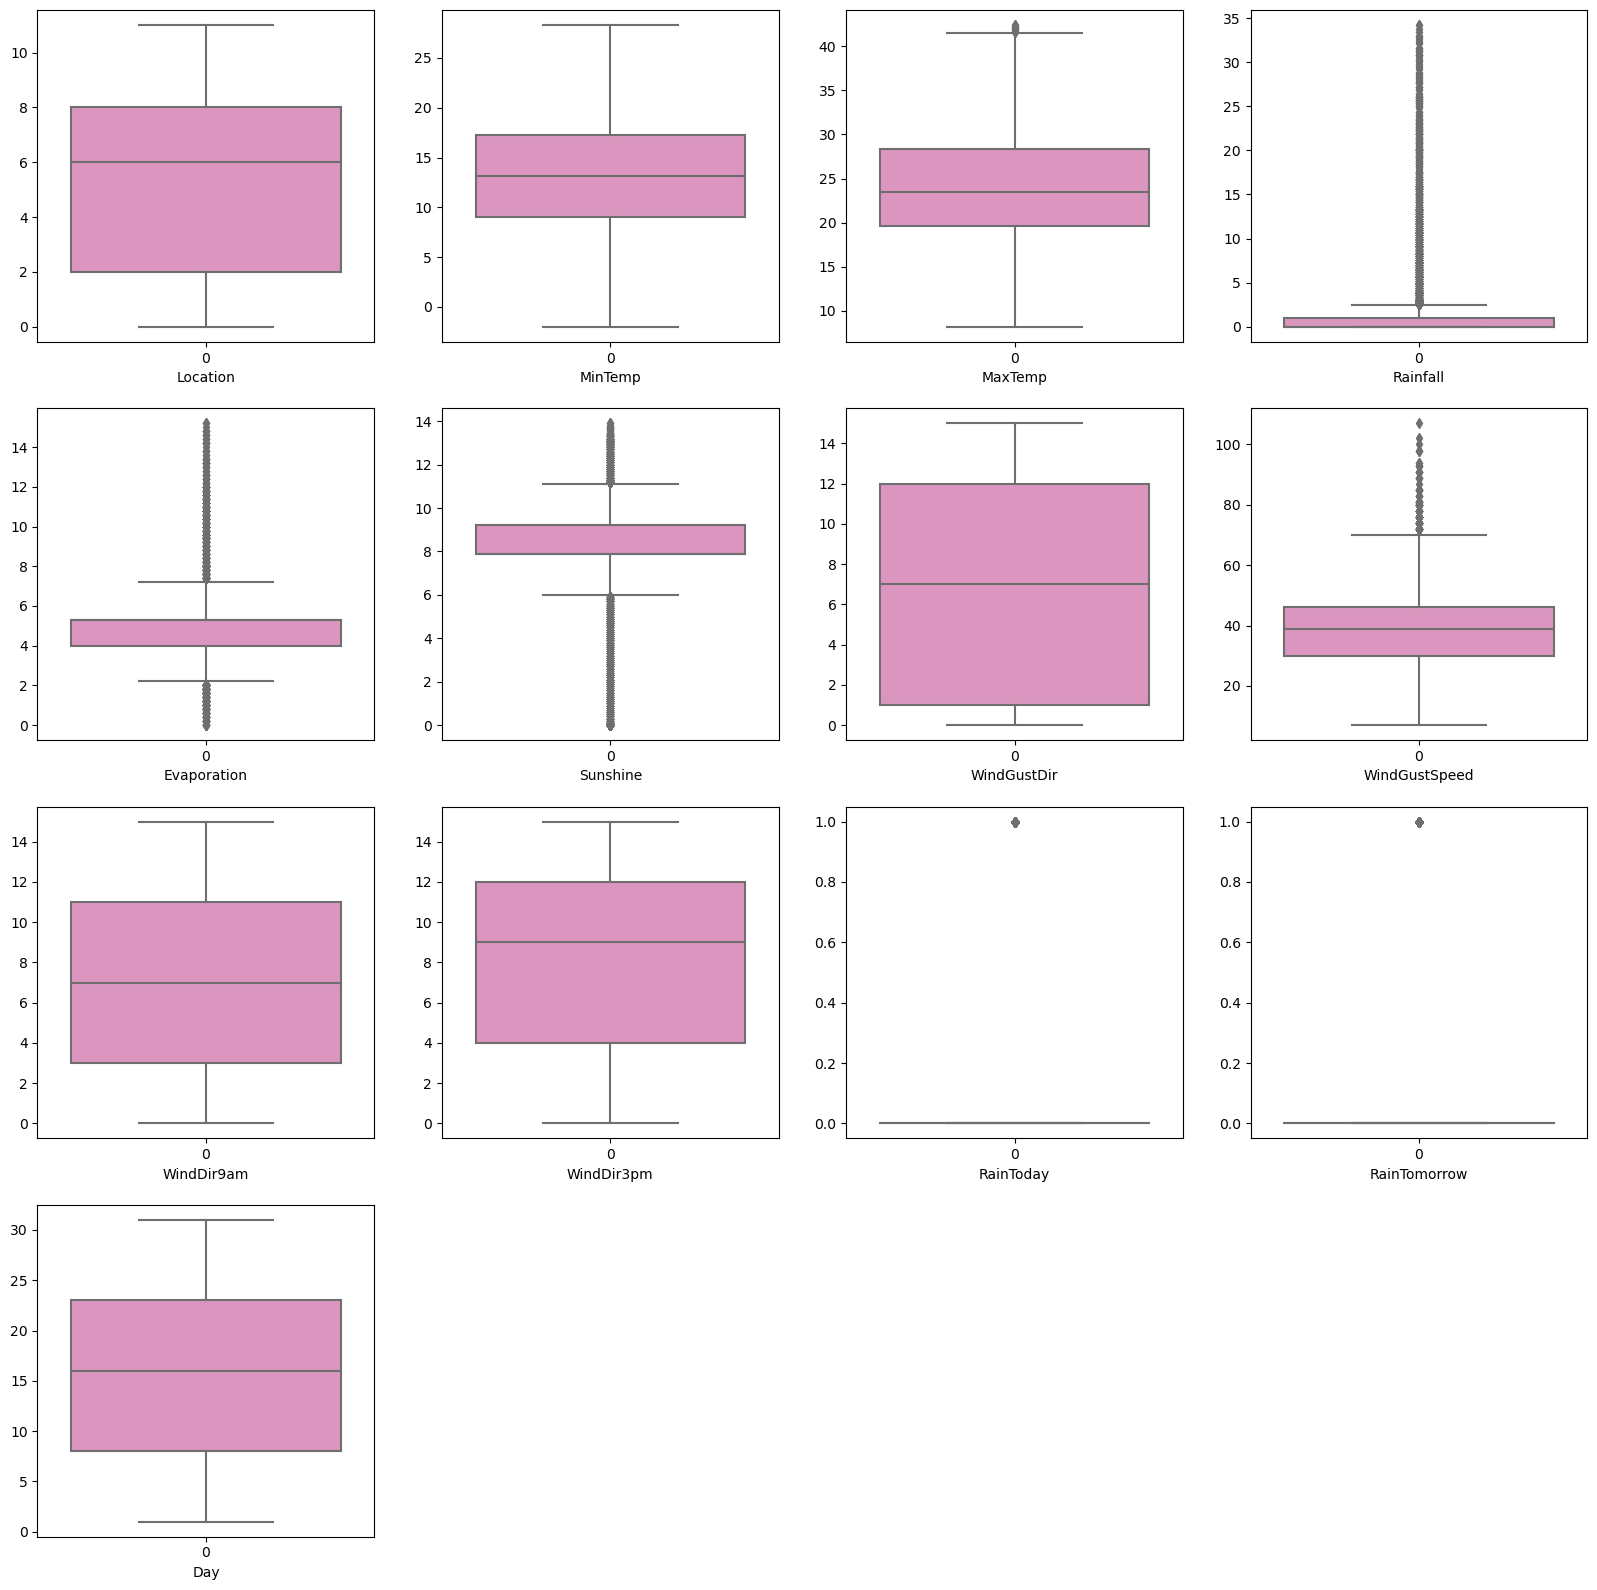

In [190]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [191]:
features = df[['Evaporation','Sunshine','RainToday','RainTomorrow','Rainfall','MaxTemp','WindGustSpeed']]
from scipy.stats import zscore
z=np.abs(zscore(features))
df = df[(z<3).all(axis=1)]
df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.302395  7.890896   
1            1      7.4  25.100000       0.0     5.302395  7.890896   
2            1     12.9  25.700000       0.0     5.302395  7.890896   
3            1      9.2  28.000000       0.0     5.302395  7.890896   
4            1     17.5  32.300000       1.0     5.302395  7.890896   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.302395  7.890896   
8421         9      3.6  25.300000       0.0     5.302395  7.890896   
8422         9      5.4  26.900000       0.0     5.302395  7.890896   
8423         9      7.8  27.000000       0.0     5.302395  7.890896   
8424         9     14.9  24.098345       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday  \
0              13      44.000000          13          14          0   
1              14      44.000000           6          15          0   
2              15      46.000000          13          15          0   
3               4      24.000000           9           0          0   
4              13      41.000000           1           7          0   
...           ...            ...         ...         ...        ...   
8420            0      31.000000           9           1          0   
8421            6      22.000000           9           3          0   
8422            3      37.000000           9          14          0   
8423            9      28.000000          10           3          0   
8424            0      38.977663           2           2          0   

      RainTomorrow  Day  Month  Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  \
0                0    1     12  2008           22.0          46.5   6.160494   
1                0    2     12  2008           13.0          34.5   4.328897   
2                0    3     12  2008           22.5          34.0   3.168403   
3                0    4     12  2008           10.0          30.5   4.328897   
4                0    5     12  2008           13.5          57.5   7.500000   
...            ...  ...    ...   ...            ...           ...        ...   
8420             0   21      6  2017           12.0          37.5   4.328897   
8421             0   22      6  2017           11.0          38.5   4.328897   
8422             0   23      6  2017            9.0          38.5   4.328897   
8423             0   24      6  2017           10.0          37.5   2.500000   
8424             0   25      6  2017           17.0          49.0   8.000000   

      Avg_Temp  Avg_Pressure  
0        19.35       1007.40  
1        20.75       1009.20  
2        22.10       1008.15  
3        22.30       1015.20  
4        23.75       1008.40  
...        ...           ...  
8420     16.25       1022.45  
8421     17.70       1021.30  
8422     19.30       1018.90  
8423     20.55       1017.95  
8424     17.95       1019.05  

[6260 rows x 20 columns]

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xr_scaled = scaler.fit_transform(x_r)
xr_scaled

array([[-1.41106838e+00,  8.27167693e-04, -8.62061159e-02, ...,
        -1.04269975e+00,  6.34664469e-01, -1.45332727e+00],
       [-1.41106838e+00, -1.10965278e+00,  2.82606113e-01, ...,
        -1.78121478e+00, -2.40450226e-01, -1.14658346e+00],
       [-1.41106838e+00, -9.17128278e-02,  3.83191266e-01, ...,
        -1.81198624e+00, -7.94919947e-01, -1.32551735e+00],
       ...,
       [ 1.52970797e+00,  8.58944324e-01, -1.51447844e-01, ...,
         1.72506583e+00,  1.39281779e+00,  1.92913176e-01],
       [-7.57562526e-01,  1.20135832e-02, -9.99614692e-01, ...,
         1.53141734e+00,  1.07724873e+00,  1.37860315e+00],
       [-1.22392179e+00,  9.96064533e-02,  1.18176548e-01, ...,
         5.67789623e-01, -5.68019424e-02, -9.46949749e-01]])

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(xr_scaled, i) for i in range (xr_scaled.shape[1])]
vif['features'] = x_r.columns
vif

vif       features
0   1.621244       Location
1   4.186560        MinTemp
2   5.108622        MaxTemp
3   1.474098    Evaporation
4   2.075910       Sunshine
5   1.533135    WindGustDir
6   2.155877  WindGustSpeed
7   1.327753     WindDir9am
8   1.342543     WindDir3pm
9   1.466818      RainToday
10  1.005844            Day
11  1.134840          Month
12  1.586208           Year
13  2.299296  Avg_WindSpeed
14  2.856831   Avg_Humidity
15  2.169005      Avg_Cloud
16  1.416312   Avg_Pressure

There is no multicollinearity in the dataset.

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [193]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_r_train,x_r_test,y_r_train,y_r_test=train_test_split(x_r,y_r,test_size=0.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_r_train,y_r_train)
    pred=LR.predict(x_r_test)
    acc=r2_score(y_r_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.8774138350034841 on Random_state  193


In [194]:
x_r_train,x_r_test,y_r_train,y_r_test=train_test_split(x_r,y_r,test_size=0.20,random_state=maxRS)

In [195]:
LR=LinearRegression()
LR.fit(x_r_train,y_r_train)
pred_LR=LR.predict(x_r_test)
pred_train=LR.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_LR))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_LR))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_LR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_LR)))

R2_score for test data:  0.8774138350034841
R2_score on training data:  85.27928577404306
Mean Absolute Error:  0.2498816180414476
Mean Squared Error:  0.14363464205240922
Root Mean Squared Error:  0.37899161211352583


In [196]:
RFR=RandomForestRegressor()
RFR.fit(x_r_train,y_r_train)
pred_RFR=RFR.predict(x_r_test)
pred_train=RFR.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_RFR))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_RFR))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_RFR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_RFR)))

R2_score for test data:  0.9196085777997934
R2_score on training data:  98.65948777593381
Mean Absolute Error:  0.19072422337738265
Mean Squared Error:  0.09419491304046387
Root Mean Squared Error:  0.3069118978476785


In [197]:
knn=KNeighborsRegressor()
knn.fit(x_r_train,y_r_train)
pred_knn=knn.predict(x_r_test)
pred_train=knn.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_knn))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_knn))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_knn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_knn)))

R2_score for test data:  0.8999644134958255
R2_score on training data:  92.74448487166673
Mean Absolute Error:  0.18245323586376747
Mean Squared Error:  0.11721204966676552
Root Mean Squared Error:  0.3423624536463739


In [198]:
DTR=DecisionTreeRegressor()
DTR.fit(x_r_train,y_r_train)
pred_DTR=DTR.predict(x_r_test)
pred_train=DTR.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_DTR))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_DTR))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_DTR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_DTR)))

R2_score for test data:  0.7983753120106994
R2_score on training data:  100.0
Mean Absolute Error:  0.22307028037246976
Mean Squared Error:  0.236244358318045
Root Mean Squared Error:  0.4860497488097746


In [199]:
GBR=GradientBoostingRegressor()
GBR.fit(x_r_train,y_r_train)
pred_GBR=GBR.predict(x_r_test)
pred_train=GBR.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_GBR))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_GBR))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_GBR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_GBR)))

R2_score for test data:  0.89518975611807
R2_score on training data:  88.73567858182648
Mean Absolute Error:  0.2279241562734278
Mean Squared Error:  0.12280653256290879
Root Mean Squared Error:  0.3504376300611976


In [200]:
RG=Ridge()
RG.fit(x_r_train,y_r_train)
pred_RG=RG.predict(x_r_test)
pred_train=RG.predict(x_r_train)
print('R2_score for test data: ',r2_score(y_r_test,pred_RG))
print('R2_score on training data: ',r2_score(y_r_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_r_test,pred_RG))
print('Mean Squared Error: ',mean_squared_error(y_r_test,pred_RG))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_r_test,pred_RG)))

R2_score for test data:  0.877411053103231
R2_score on training data:  85.27928488714042
Mean Absolute Error:  0.24990875041679506
Mean Squared Error:  0.14363790161475137
Root Mean Squared Error:  0.37899591239847347


In [201]:
score=cross_val_score(RFR,x_r,y_r,cv=5)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_RFR)-score.mean()))

[0.87700531 0.81164751 0.82745557 0.95720634 0.95088064]
0.8848390744738843
Difference between R2 score and cross validation score is:  0.03476950332590911


In [202]:
score1=cross_val_score(LR,x_r,y_r)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_LR)-score1.mean()))

[0.8605473  0.79553863 0.79723399 0.90230245 0.86788353]
0.8447011818826088
Difference between R2 score and cross validation score is:  0.032712653120875346


In [203]:
score2=cross_val_score(knn,x_r,y_r)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_knn)-score2.mean()))

[0.8242356  0.7828233  0.79873862 0.95302824 0.94530336]
0.8608258243433417
Difference between R2 score and cross validation score is:  0.039138589152483805


In [204]:
score3=cross_val_score(DTR,x_r,y_r)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_DTR)-score3.mean()))

[0.73790153 0.5413409  0.66777898 0.8768142  0.9045162 ]
0.745670361188048
Difference between R2 score and cross validation score is:  0.052704950822651475


In [205]:
score4=cross_val_score(GBR,x_r,y_r)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_GBR)-score4.mean()))

[0.86413061 0.80471736 0.81273686 0.91973882 0.89159676]
0.8585840797613112
Difference between R2 score and cross validation score is:  0.03660567635675871


In [207]:
score5=cross_val_score(RG,x_r,y_r)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_r_test,pred_RG)-score5.mean()))

[0.86054667 0.79554121 0.79723871 0.90229962 0.86788602]
0.8447024444428719
Difference between R2 score and cross validation score is:  0.03270860866035907


I am selecting RandomForestRegressor as the best working model as the difference between the R2 score and cross validation score is minimum for this

In [209]:
param_grid={'n_estimators':[100],
            'criterion':['squared_error'], 
            'max_depth':[None], 
            'min_samples_split':[2], 
            'min_samples_leaf':[1], 
            'min_weight_fraction_leaf':[0.0], 
            'max_features':[1.0], 
            'max_leaf_nodes':[None],
            'min_impurity_decrease':[0.0], 
            'bootstrap':[True], 
            'oob_score':[False], 
            'n_jobs':[None], 
            'random_state':[None], 
            'verbose':[0], 
            'warm_start':[False], 
            'ccp_alpha':[0.0], 
            'max_samples':[None]
           }

In [213]:
GSCV=GridSearchCV(RandomForestRegressor(),param_grid,cv=17)

In [214]:
GSCV.fit(x_r_train,y_r_train)

GridSearchCV(cv=17, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': [1.0], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [215]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [221]:
Final_model=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
Classifer=Final_model.fit(x_r_train,y_r_train)
lr_pred=Final_model.predict(x_r_test)
lr_r2_score = r2_score(y_r_test, lr_pred)
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 92.05930161475952


As we can see that R2 score is increased from 91.96 to 92.05 hence saving our model

In [222]:
import joblib
joblib.dump(Final_model, "Rainfall Prediction1.pkl")

['Rainfall Prediction1.pkl']

In [223]:
model = joblib.load("Rainfall Prediction1.pkl")
prediction=Final_model.predict(x_r_test)
prediction

array([-0.4565018 ,  1.54774573, -0.41202878, ...,  1.51598806,
       -0.64128836, -0.63188154])

In [224]:
a=np.array(y_r_test)
df1=pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

Predicted  Original
0     -0.456502 -0.681888
1      1.547746  1.678238
2     -0.412029 -0.681888
3     -0.601313 -0.681888
4      1.800428  1.860041
...         ...       ...
2071  -0.675880 -0.681888
2072  -0.574882 -0.681888
2073   1.515988  1.631412
2074  -0.641288 -0.681888
2075  -0.631882 -0.681888

[2076 rows x 2 columns]

In [225]:
conclusion=pd.DataFrame([Final_model.predict(x_r_test)[:],y_r_test[:]],index=["Predicted","Original"])
conclusion

0         1         2         3         4         5     \
Predicted -0.456502  1.547746 -0.412029 -0.601313  1.800428 -0.681888   
Original  -0.681888  1.678238 -0.681888 -0.681888  1.860041 -0.681888   

               6         7         8         9     ...      2066      2067  \
Predicted -0.551821  1.640667 -0.618191 -0.582274  ... -0.534764  1.512728   
Original  -0.081003  1.704373 -0.681888 -0.681888  ...  0.315209  1.456336   

               2068      2069      2070      2071      2072      2073  \
Predicted -0.650596  1.595471 -0.331820 -0.675880 -0.574882  1.515988   
Original  -0.665236  1.599174 -0.081003 -0.681888 -0.681888  1.631412   

               2074      2075  
Predicted -0.641288 -0.631882  
Original  -0.681888 -0.681888  

[2 rows x 2076 columns]

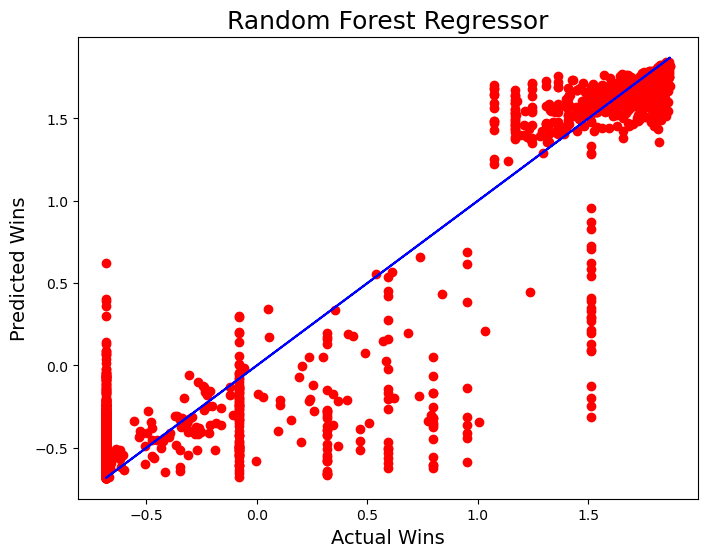

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_r_test,y=pred_RFR,color='r')
plt.plot(y_r_test,y_r_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.savefig('RFR.png')
plt.show()